## Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from collections import Counter,namedtuple,defaultdict,OrderedDict
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load the datasets present in the 100000-Patients folder

## Perform EDA (Exploratory Data Analysis) steps on all the datasets

## 1. AdmissionsCorePopulatedTable

In [3]:
data_AdmissionsCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsCorePopulatedTable.txt",sep='\t')
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160


In [4]:
data_AdmissionsCorePopulatedTable.tail()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
361755,DB495784-37B2-4185-8D66-B76E8374099D,5,2006-12-28 10:18:26.557,2007-01-13 00:07:55.090
361756,DB495784-37B2-4185-8D66-B76E8374099D,6,2010-02-18 08:23:00.567,2010-02-20 12:04:49.407
361757,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,1,1990-06-10 11:09:48.877,1990-06-22 23:40:16.407
361758,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2,2005-01-21 21:31:56.527,2005-02-02 01:23:26.260
361759,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,3,2009-04-10 21:56:04.437,2009-04-13 00:59:06.183


### 1.1) Perform EDA

In [5]:
data_AdmissionsCorePopulatedTable.shape

(361760, 4)

In [6]:
data_AdmissionsCorePopulatedTable.size

1447040

In [7]:
data_AdmissionsCorePopulatedTable.dtypes

PatientID             object
AdmissionID            int64
AdmissionStartDate    object
AdmissionEndDate      object
dtype: object

In [8]:
data_AdmissionsCorePopulatedTable.columns

Index(['PatientID', 'AdmissionID', 'AdmissionStartDate', 'AdmissionEndDate'], dtype='object')

In [9]:
data_AdmissionsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361760 entries, 0 to 361759
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   PatientID           361760 non-null  object
 1   AdmissionID         361760 non-null  int64 
 2   AdmissionStartDate  361760 non-null  object
 3   AdmissionEndDate    361760 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.0+ MB


In [10]:
data_AdmissionsCorePopulatedTable.describe()

,AdmissionID
count,361760.000000
mean,2.629293
std,1.509341
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,12.000000


In [11]:
data_AdmissionsCorePopulatedTable.count()

PatientID             361760
AdmissionID           361760
AdmissionStartDate    361760
AdmissionEndDate      361760
dtype: int64

In [12]:
data_AdmissionsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,0,0,0,0


In [13]:
data_AdmissionsCorePopulatedTable.index

RangeIndex(start=0, stop=361760, step=1)

In [14]:
data_AdmissionsCorePopulatedTable.duplicated().sum()

0

In [15]:
Counter(data_AdmissionsCorePopulatedTable.AdmissionID)

Counter({1: 100000,
         2: 94987,
         3: 75441,
         4: 48347,
         5: 25525,
         6: 11157,
         7: 4265,
         8: 1457,
         9: 427,
         10: 130,
         11: 21,
         12: 3})

In [16]:
# Counter(data_AdmissionsCorePopulatedTable.PatientID)

### 1.2) Checking for the outliers in the AdmissionsCorePopulatedTable

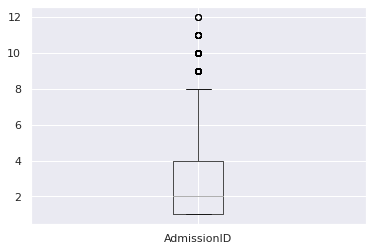

In [17]:
data_AdmissionsCorePopulatedTable.boxplot();

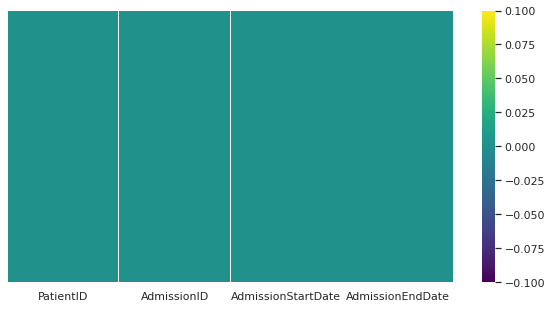

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_AdmissionsCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### 1.3) Removing the outliers present in the AdmissionID

In [19]:
X=data_AdmissionsCorePopulatedTable.AdmissionID
X.head(10)

0    5
1    1
2    2
3    3
4    4
5    5
6    1
7    2
8    3
9    1
Name: AdmissionID, dtype: int64

In [20]:
remove_outliers_AdmissionID=X.between(X.quantile(0.05),X.quantile(0.9))
remove_outliers_AdmissionID.head()

0    True
1    True
2    True
3    True
4    True
Name: AdmissionID, dtype: bool

In [21]:
print(str(X[remove_outliers_AdmissionID].size)+"/"+str(X.size) + " remaining data points")

344300/361760 remaining data points


Text(0.5, 0, 'AdmissionID')

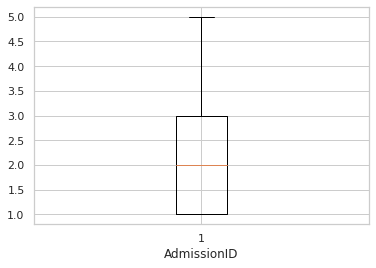

In [22]:
plt.boxplot(X[remove_outliers_AdmissionID])
plt.xlabel("AdmissionID")

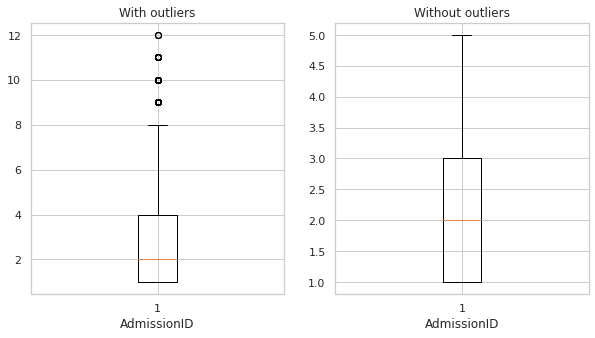

In [23]:
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("AdmissionID")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("AdmissionID")
axis[1].boxplot(X[remove_outliers_AdmissionID]);

In [24]:
data_AdmissionsCorePopulatedTable['clean_AdmissionID']=X[remove_outliers_AdmissionID]

In [25]:
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5.0
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333,1.0
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737,2.0
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407,3.0
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160,4.0


In [26]:
data_AdmissionsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID
0,0,0,0,0,17460


In [27]:
data_AdmissionsCorePopulatedTable.drop(labels='AdmissionID',axis=1,inplace=True)
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5.0
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333,1.0
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737,2.0
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407,3.0
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160,4.0


In [28]:
data_AdmissionsCorePopulatedTable.dropna(axis=0,inplace=True)

In [29]:
data_AdmissionsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID
0,0,0,0,0


In [30]:
data_AdmissionsCorePopulatedTable.clean_AdmissionID = data_AdmissionsCorePopulatedTable.clean_AdmissionID.astype(int)
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333,1
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737,2
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407,3
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160,4


In [31]:
data_AdmissionsCorePopulatedTable.shape

(344300, 4)

In [32]:
data_AdmissionsCorePopulatedTable.size

1377200

In [33]:
data_AdmissionsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344300 entries, 0 to 361759
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   PatientID           344300 non-null  object
 1   AdmissionStartDate  344300 non-null  object
 2   AdmissionEndDate    344300 non-null  object
 3   clean_AdmissionID   344300 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 13.1+ MB


### 1.4) Segregating the Patient's data with respect to Admission ID

In [34]:
data_AdmissionID=data_AdmissionsCorePopulatedTable.groupby(['clean_AdmissionID'])['PatientID'].count()
data_AdmissionID

clean_AdmissionID
1    100000
2     94987
3     75441
4     48347
5     25525
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Admission ID')

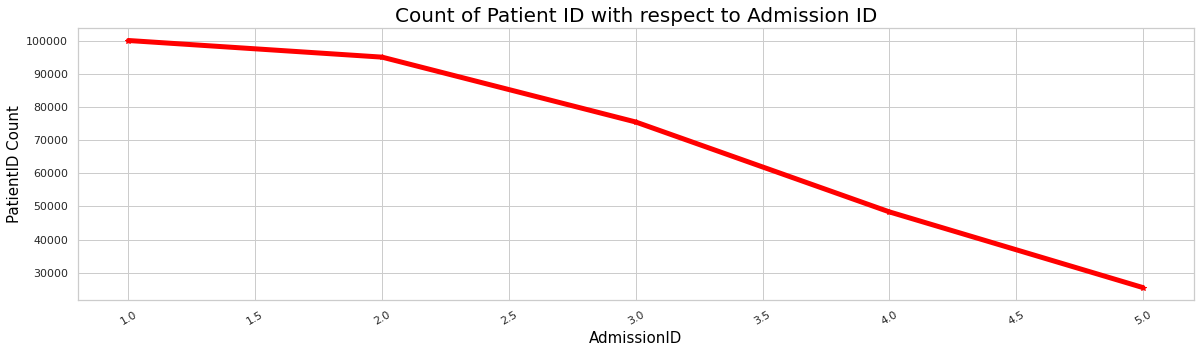

In [35]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_AdmissionID,color='red',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("AdmissionID",fontsize=15,color='black')
plt.ylabel("PatientID Count",fontsize=15,color='black')
plt.title("Count of Patient ID with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

In [36]:
data_AdmissionStartDate=data_AdmissionsCorePopulatedTable.groupby(['clean_AdmissionID'])['AdmissionStartDate'].count()
data_AdmissionStartDate

clean_AdmissionID
1    100000
2     94987
3     75441
4     48347
5     25525
Name: AdmissionStartDate, dtype: int64

In [37]:
data_AdmissionEndDate=data_AdmissionsCorePopulatedTable.groupby(['clean_AdmissionID'])['AdmissionEndDate'].count()
data_AdmissionEndDate

clean_AdmissionID
1    100000
2     94987
3     75441
4     48347
5     25525
Name: AdmissionEndDate, dtype: int64

Text(0.5, 1.0, 'Count of Admission Start Date with respect to Admission ID')

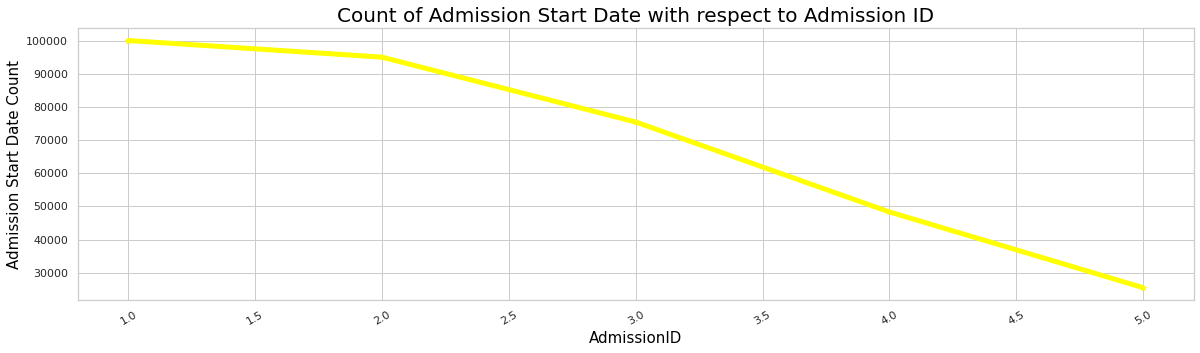

In [38]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_AdmissionStartDate,color='yellow',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("AdmissionID",fontsize=15,color='black')
plt.ylabel("Admission Start Date Count",fontsize=15,color='black')
plt.title("Count of Admission Start Date with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

Text(0.5, 1.0, 'Count of Admission End Date with respect to Admission ID')

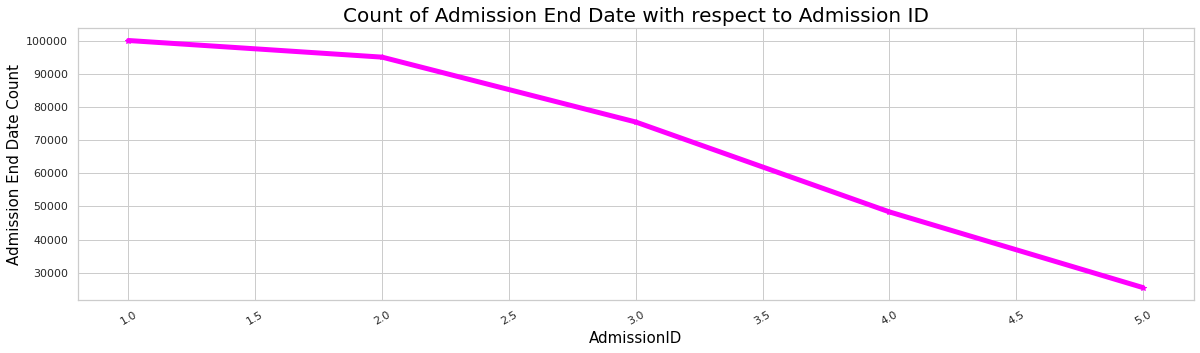

In [39]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_AdmissionEndDate,color='magenta',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("AdmissionID",fontsize=15,color='black')
plt.ylabel("Admission End Date Count",fontsize=15,color='black')
plt.title("Count of Admission End Date with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

# ------------------------------------------------------------------------------------------------------------

## 2. AdmissionsDiagnosesCorePopulatedTable

In [40]:
data_AdmissionsDiagnosesCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsDiagnosesCorePopulatedTable.txt",sep='\t')
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,3,F80.1,Expressive language disorder
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,4,R04.81,Acute idiopathic pulmonary hemorrhage in infants
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,5,I36,Nonrheumatic tricuspid valve disorders
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,1,H16.43,Localized vascularization of cornea
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,2,M05.161,Rheumatoid lung disease with rheumatoid arthri...


In [41]:
data_AdmissionsDiagnosesCorePopulatedTable.tail()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
361755,DB495784-37B2-4185-8D66-B76E8374099D,5,M90.631,"Osteitis deformans in neoplastic diseases, rig..."
361756,DB495784-37B2-4185-8D66-B76E8374099D,6,E09.21,Drug or chemical induced diabetes mellitus wit...
361757,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,1,C57.22,Malignant neoplasm of left round ligament
361758,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2,C92.12,"Chronic myeloid leukemia, BCR/ABL-positive, in..."
361759,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,3,D32.0,Benign neoplasm of cerebral meninges


### 2.1) Perform EDA

In [42]:
data_AdmissionsDiagnosesCorePopulatedTable.shape

(361760, 4)

In [43]:
data_AdmissionsDiagnosesCorePopulatedTable.size

1447040

In [44]:
data_AdmissionsDiagnosesCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361760 entries, 0 to 361759
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   PatientID                    361760 non-null  object
 1   AdmissionID                  361760 non-null  int64 
 2   PrimaryDiagnosisCode         361760 non-null  object
 3   PrimaryDiagnosisDescription  361760 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.0+ MB


In [45]:
data_AdmissionsDiagnosesCorePopulatedTable.describe()

,AdmissionID
count,361760.000000
mean,2.629293
std,1.509341
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,12.000000


In [46]:
data_AdmissionsDiagnosesCorePopulatedTable.index

RangeIndex(start=0, stop=361760, step=1)

In [47]:
data_AdmissionsDiagnosesCorePopulatedTable.dtypes

PatientID                      object
AdmissionID                     int64
PrimaryDiagnosisCode           object
PrimaryDiagnosisDescription    object
dtype: object

In [48]:
data_AdmissionsDiagnosesCorePopulatedTable.columns

Index(['PatientID', 'AdmissionID', 'PrimaryDiagnosisCode',
       'PrimaryDiagnosisDescription'],
      dtype='object')

In [49]:
data_AdmissionsDiagnosesCorePopulatedTable.duplicated().sum()

0

In [50]:
data_AdmissionsDiagnosesCorePopulatedTable.count()

PatientID                      361760
AdmissionID                    361760
PrimaryDiagnosisCode           361760
PrimaryDiagnosisDescription    361760
dtype: int64

In [51]:
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0,0


In [52]:
Counter(data_AdmissionsDiagnosesCorePopulatedTable.AdmissionID)

Counter({1: 100000,
         2: 94987,
         3: 75441,
         4: 48347,
         5: 25525,
         6: 11157,
         7: 4265,
         8: 1457,
         9: 427,
         10: 130,
         11: 21,
         12: 3})

In [53]:
# Counter(data_AdmissionsDiagnosesCorePopulatedTable.PrimaryDiagnosisCode)

In [54]:
data_AdmissionsDiagnosesCorePopulatedTable.index

RangeIndex(start=0, stop=361760, step=1)

### 2.2) Checking for the outliers in AdmissionsDiagnosesCorePopulatedTable

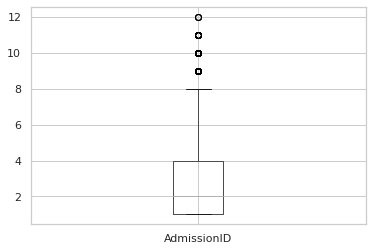

In [55]:
data_AdmissionsDiagnosesCorePopulatedTable.boxplot();

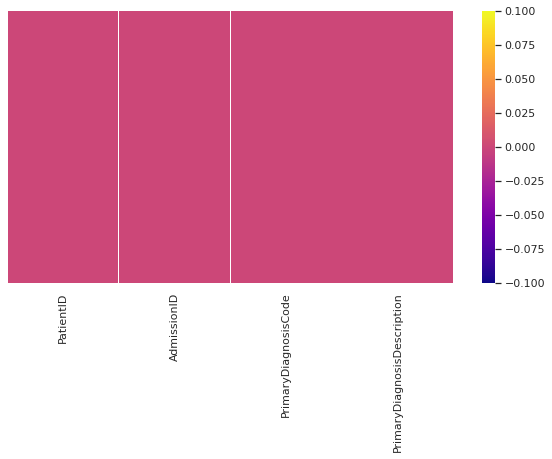

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_AdmissionsDiagnosesCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='plasma')

### 2.3)Removing the outliers from  AdmissionID

344300/361760 remaining data points


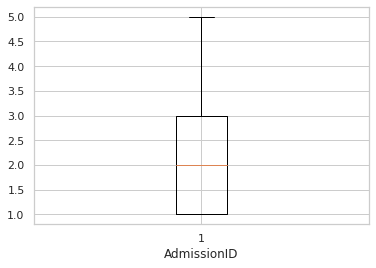

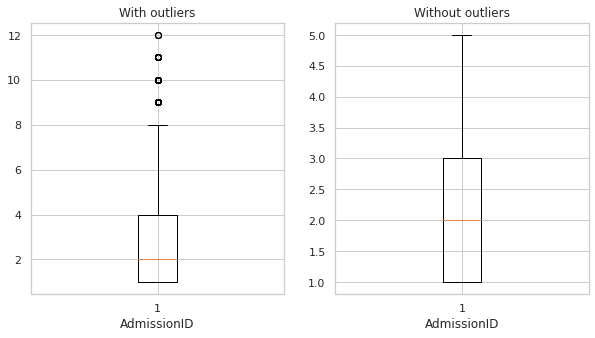

In [57]:
X=data_AdmissionsDiagnosesCorePopulatedTable.AdmissionID
X.head(10)
remove_outliers_AdmissionID=X.between(X.quantile(0.05),X.quantile(0.9))
remove_outliers_AdmissionID.head()
print(str(X[remove_outliers_AdmissionID].size)+"/"+str(X.size) + " remaining data points")
plt.boxplot(X[remove_outliers_AdmissionID])
plt.xlabel("AdmissionID")
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("AdmissionID")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("AdmissionID")
axis[1].boxplot(X[remove_outliers_AdmissionID]);

data_AdmissionsDiagnosesCorePopulatedTable['clean_AdmissionID']=X[remove_outliers_AdmissionID]

In [58]:
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,3,F80.1,Expressive language disorder,3.0
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,4,R04.81,Acute idiopathic pulmonary hemorrhage in infants,4.0
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,5,I36,Nonrheumatic tricuspid valve disorders,5.0
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,1,H16.43,Localized vascularization of cornea,1.0
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,2,M05.161,Rheumatoid lung disease with rheumatoid arthri...,2.0


In [59]:
data_AdmissionsDiagnosesCorePopulatedTable.drop(labels='AdmissionID',axis=1,inplace=True)

In [60]:
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,F80.1,Expressive language disorder,3.0
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,R04.81,Acute idiopathic pulmonary hemorrhage in infants,4.0
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,I36,Nonrheumatic tricuspid valve disorders,5.0
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,H16.43,Localized vascularization of cornea,1.0
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,M05.161,Rheumatoid lung disease with rheumatoid arthri...,2.0


In [61]:
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,0,0,0,17460


In [62]:
data_AdmissionsDiagnosesCorePopulatedTable.dropna(axis=0,inplace=True)

In [63]:
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,0,0,0,0


In [64]:
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,F80.1,Expressive language disorder,3.0
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,R04.81,Acute idiopathic pulmonary hemorrhage in infants,4.0
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,I36,Nonrheumatic tricuspid valve disorders,5.0
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,H16.43,Localized vascularization of cornea,1.0
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,M05.161,Rheumatoid lung disease with rheumatoid arthri...,2.0


In [65]:
data_AdmissionsDiagnosesCorePopulatedTable.clean_AdmissionID=data_AdmissionsDiagnosesCorePopulatedTable.clean_AdmissionID.astype('int')

In [66]:
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,F80.1,Expressive language disorder,3
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,R04.81,Acute idiopathic pulmonary hemorrhage in infants,4
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,I36,Nonrheumatic tricuspid valve disorders,5
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,H16.43,Localized vascularization of cornea,1
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,M05.161,Rheumatoid lung disease with rheumatoid arthri...,2


### 2.4) Segregating Diagnosis data of patients with respect to various parameters

In [67]:
data_PatientID2=data_AdmissionsDiagnosesCorePopulatedTable.groupby(by=['clean_AdmissionID'])['PatientID'].count()
data_PatientID2

clean_AdmissionID
1    100000
2     94987
3     75441
4     48347
5     25525
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Admission ID')

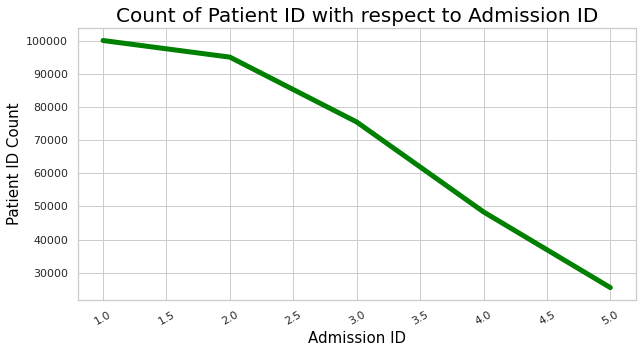

In [68]:
plt.figure(figsize=(10,5))
splot= plt.plot(data_PatientID2,color='green',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Patient ID Count",fontsize=15,color='black')
plt.title("Count of Patient ID with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

In [69]:
data_diagnosis=data_AdmissionsDiagnosesCorePopulatedTable.groupby(by=['PrimaryDiagnosisCode'])['clean_AdmissionID'].count()
data_diagnosis

PrimaryDiagnosisCode
A18.7       58
A21.2      136
A22.1      140
A28.1      145
A31.0      130
          ... 
Z95.5      129
Z95.810    140
Z95.820    144
Z98.61     125
Z98.62      78
Name: clean_AdmissionID, Length: 2625, dtype: int64

Text(0.5, 1.0, 'Count of Primary Diagnosis Code with respect to Admission ID')

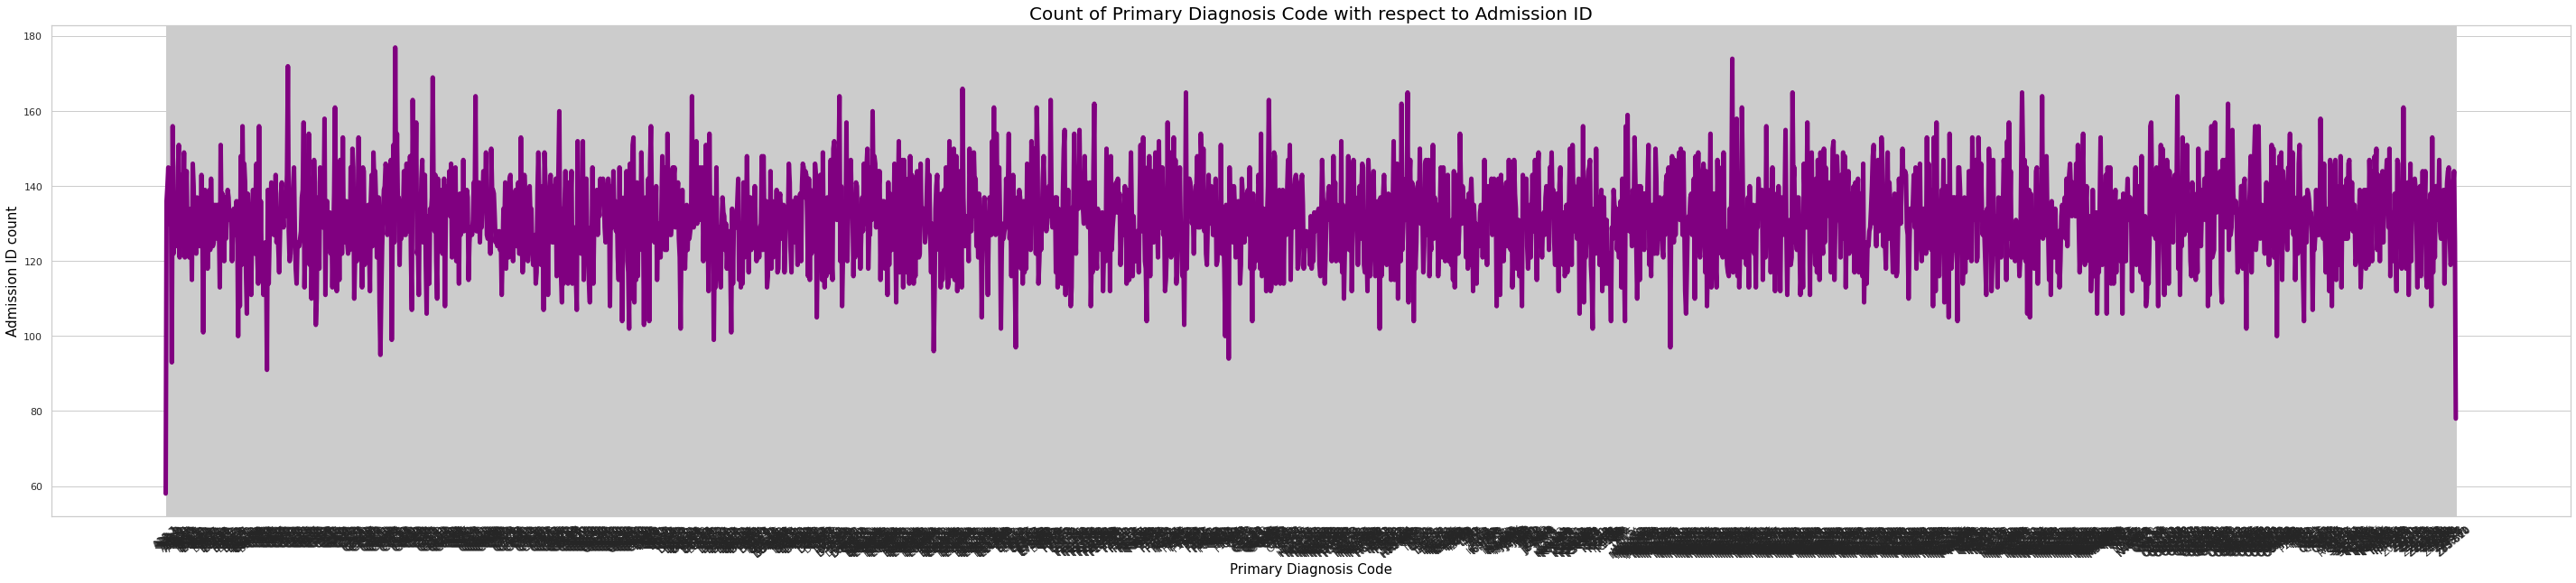

In [70]:
plt.figure(figsize=(50,10))
splot= plt.plot(data_diagnosis,color='purple',lw=5)
plt.xticks(rotation=40)
plt.xlabel("Primary Diagnosis Code",fontsize=15,color='black')
plt.ylabel("Admission ID count",fontsize=15,color='black')
plt.title("Count of Primary Diagnosis Code with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

In [71]:
data_diagnosisdescription=data_AdmissionsDiagnosesCorePopulatedTable.groupby(by=['clean_AdmissionID'])['PrimaryDiagnosisDescription'].count()
data_diagnosisdescription

clean_AdmissionID
1    100000
2     94987
3     75441
4     48347
5     25525
Name: PrimaryDiagnosisDescription, dtype: int64

Text(0.5, 1.0, 'Count of Primary Diagnosis Description with respect to Admission ID ')

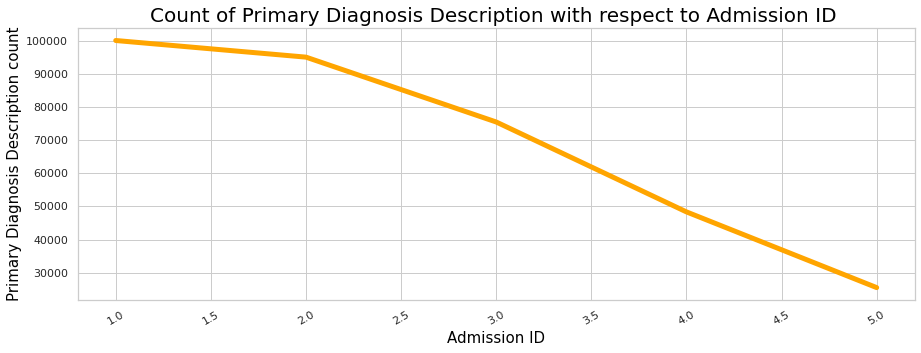

In [72]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_diagnosisdescription,color='orange',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Primary Diagnosis Description count",fontsize=15,color='black')
plt.title("Count of Primary Diagnosis Description with respect to Admission ID ",fontdict={'fontsize':20,'color':'black'})

# ----------------------------------------------------------------------------------------------------------

## 3) PatientCorePopulatedTable

In [73]:
data_PatientCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/PatientCorePopulatedTable.txt",sep="\t")
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,English,13.70
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,English,15.73
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,English,7.09
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated,Spanish,2.17
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married,English,18.67


In [74]:
data_PatientCorePopulatedTable.tail()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
99995,9E2BB61E-5D79-4F69-882A-6EE795B1A205,Female,1974-04-22 02:21:57.093,White,Married,Spanish,15.44
99996,2BF3C25A-0624-4590-AF1A-C30286C11F2B,Female,1954-09-20 15:48:17.063,White,Married,English,13.43
99997,B90062A9-4D85-4A9E-A493-4F2AFFBB8808,Male,1953-01-10 10:31:29.323,White,Divorced,English,16.23
99998,DB495784-37B2-4185-8D66-B76E8374099D,Female,1921-12-14 01:35:12.387,White,Married,English,16.76
99999,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,Female,1968-10-30 10:54:13.323,White,Unknown,English,11.27


### 3.1) Perform EDA

In [75]:
data_PatientCorePopulatedTable.shape

(100000, 7)

In [76]:
data_PatientCorePopulatedTable.size

700000

In [77]:
data_PatientCorePopulatedTable.dtypes

PatientID                                   object
PatientGender                               object
PatientDateOfBirth                          object
PatientRace                                 object
PatientMaritalStatus                        object
PatientLanguage                             object
PatientPopulationPercentageBelowPoverty    float64
dtype: object

In [78]:
data_PatientCorePopulatedTable.columns

Index(['PatientID', 'PatientGender', 'PatientDateOfBirth', 'PatientRace',
       'PatientMaritalStatus', 'PatientLanguage',
       'PatientPopulationPercentageBelowPoverty'],
      dtype='object')

In [79]:
data_PatientCorePopulatedTable.index

RangeIndex(start=0, stop=100000, step=1)

In [80]:
data_PatientCorePopulatedTable.duplicated().sum()

0

In [81]:
data_PatientCorePopulatedTable.count()

PatientID                                  100000
PatientGender                              100000
PatientDateOfBirth                         100000
PatientRace                                100000
PatientMaritalStatus                       100000
PatientLanguage                            100000
PatientPopulationPercentageBelowPoverty    100000
dtype: int64

In [82]:
data_PatientCorePopulatedTable.describe()

,PatientPopulationPercentageBelowPoverty
count,100000.000000
mean,21.557870
std,23.249851
min,0.000000
25%,11.980000
50%,15.060000
75%,18.150000
max,100.000000


In [83]:
data_PatientCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   PatientID                                100000 non-null  object 
 1   PatientGender                            100000 non-null  object 
 2   PatientDateOfBirth                       100000 non-null  object 
 3   PatientRace                              100000 non-null  object 
 4   PatientMaritalStatus                     100000 non-null  object 
 5   PatientLanguage                          100000 non-null  object 
 6   PatientPopulationPercentageBelowPoverty  100000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.3+ MB


In [84]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,0


### 3.2) Checking for the outliers

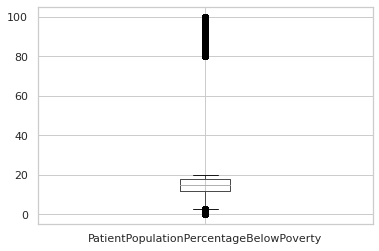

In [85]:
data_PatientCorePopulatedTable.boxplot();

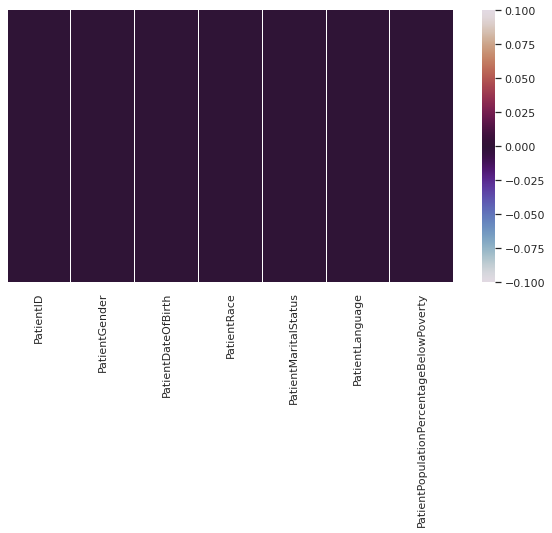

In [86]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_PatientCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='twilight')

### 3.3) Removing the outliers

85010/100000 remaining data points


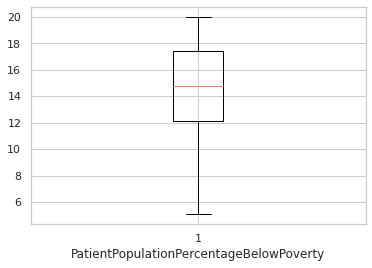

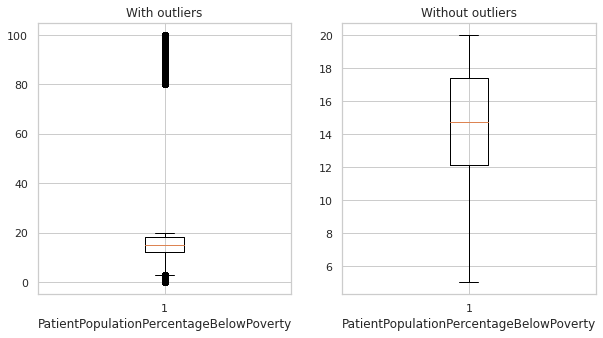

In [87]:
X=data_PatientCorePopulatedTable.PatientPopulationPercentageBelowPoverty
X.head(10)
remove_outliers_PatientPopulationPercentageBelowPoverty=X.between(X.quantile(0.05),X.quantile(0.9))
remove_outliers_PatientPopulationPercentageBelowPoverty.head()
print(str(X[remove_outliers_PatientPopulationPercentageBelowPoverty].size)+"/"+str(X.size) + " remaining data points")
plt.boxplot(X[remove_outliers_PatientPopulationPercentageBelowPoverty])
plt.xlabel("PatientPopulationPercentageBelowPoverty")
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("PatientPopulationPercentageBelowPoverty")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("PatientPopulationPercentageBelowPoverty")
axis[1].boxplot(X[remove_outliers_PatientPopulationPercentageBelowPoverty]);

data_PatientCorePopulatedTable['clean_PatientPopulationPercentageBelowPoverty']=X[remove_outliers_PatientPopulationPercentageBelowPoverty]

In [88]:
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,clean_PatientPopulationPercentageBelowPoverty
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,English,13.70,13.70
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,English,15.73,15.73
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,English,7.09,7.09
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated,Spanish,2.17,NaN
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married,English,18.67,18.67


In [89]:
data_PatientCorePopulatedTable.drop(labels='PatientPopulationPercentageBelowPoverty',axis=1,inplace=True)

In [90]:
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,English,13.70
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,English,15.73
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,English,7.09
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated,Spanish,NaN
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married,English,18.67


In [91]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,14990


In [92]:
data_PatientCorePopulatedTable.dropna(axis=0,inplace=True)

In [93]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,0


### 3.4) Segreggating the patient's data with respect to various parameters

In [94]:
data_PatientGender=data_PatientCorePopulatedTable.groupby(by=['PatientGender'])['PatientID'].count()
data_PatientGender

PatientGender
Female    44242
Male      40768
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Gender ')

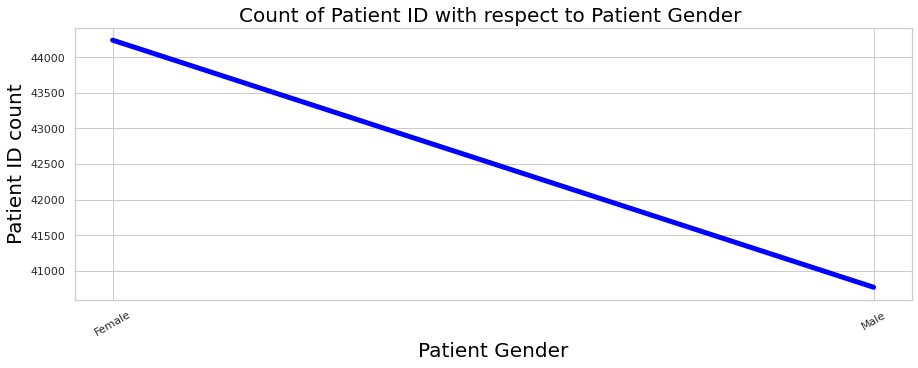

In [95]:
plt.figure(figsize=(15,5))
plt.plot(data_PatientGender,lw=5,color='blue')
plt.xticks(rotation=30)
plt.xlabel("Patient Gender",fontsize=20,color='black')
plt.ylabel("Patient ID count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Gender ",fontdict={'fontsize':20,'color':'black'})

In [96]:
data_PatientRace=data_PatientCorePopulatedTable.groupby(by=['PatientRace'])['PatientID'].count()
data_PatientRace

PatientRace
African American    12808
Asian               19526
Unknown             11070
White               41606
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Race ')

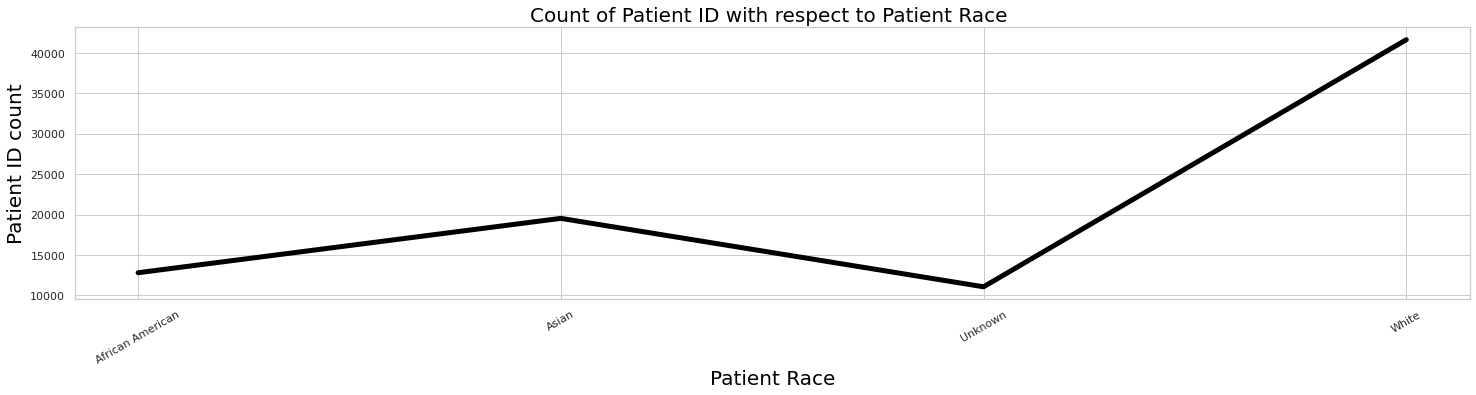

In [97]:
plt.figure(figsize=(25,5))
plt.plot(data_PatientRace,lw=5,color='black')
plt.xticks(rotation=30)
plt.xlabel("Patient Race",fontsize=20,color='black')
plt.ylabel("Patient ID count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Race ",fontdict={'fontsize':20,'color':'black'})

In [98]:
data_PatientMaritalStatus=data_PatientCorePopulatedTable.groupby(by=['PatientMaritalStatus'])['PatientID'].count()
data_PatientMaritalStatus

PatientMaritalStatus
Divorced      9335
Married      38303
Separated     4250
Single       27222
Unknown       5066
Widowed        834
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Marital Status ')

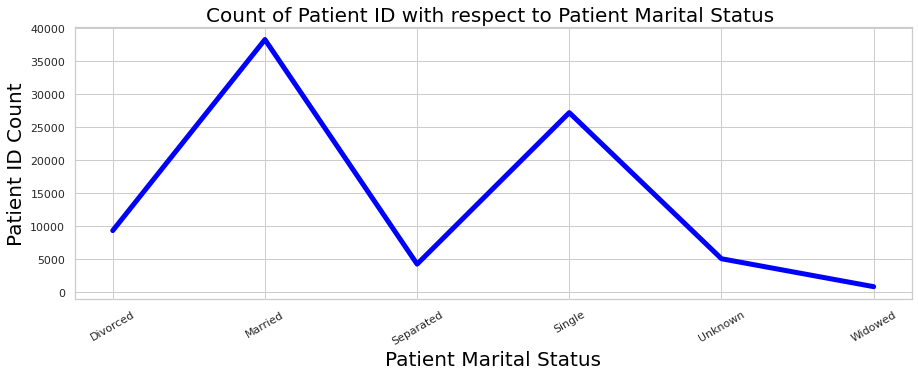

In [99]:
plt.figure(figsize=(15,5))
plt.plot(data_PatientMaritalStatus,lw=5,color='blue')
plt.xticks(rotation=30)
plt.xlabel("Patient Marital Status",fontsize=20,color='black')
plt.ylabel("Patient ID Count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Marital Status ",fontdict={'fontsize':20,'color':'black'})

In [100]:
data_PatientLanguage=data_PatientCorePopulatedTable.groupby(by=['PatientLanguage'])['PatientID'].count()
data_PatientLanguage

PatientLanguage
English      54445
Icelandic    10207
Spanish      15254
Unknown       5104
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Language ')

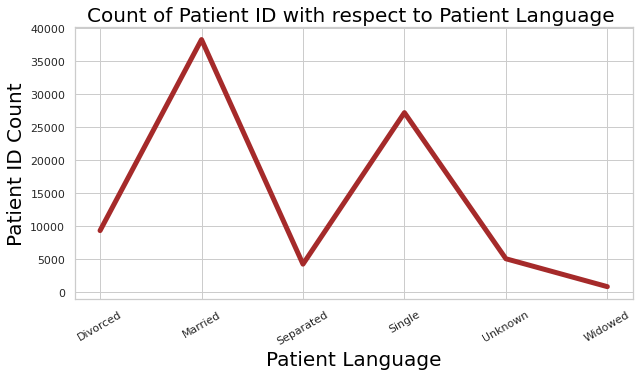

In [101]:
plt.figure(figsize=(10,5))
plt.plot(data_PatientMaritalStatus,lw=5,color='brown')
plt.xticks(rotation=30)
plt.xlabel("Patient Language",fontsize=20,color='black')
plt.ylabel("Patient ID Count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Language ",fontdict={'fontsize':20,'color':'black'})

# --------------------------------------------------------------------------------------------------------

## 4) Merging the two tables AdmissionsCorePopulatedTable and AdmissionsDiagnosesCorePopulatedTable

In [102]:
data_Admissions_Core_Diagnoses_Merge=pd.merge(data_AdmissionsCorePopulatedTable,data_AdmissionsDiagnosesCorePopulatedTable,on=["PatientID",'clean_AdmissionID'],how='outer')
data_Admissions_Core_Diagnoses_Merge.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5,M11.07,"Hydroxyapatite deposition disease, ankle and foot"
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333,1,C13.2,Malignant neoplasm of posterior wall of hypoph...
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737,2,G30,Alzheimer's disease
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407,3,H67.2,"Otitis media in diseases classified elsewhere,..."
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160,4,M50.1,Cervical disc disorder with radiculopathy


In [103]:
data_Admissions_Core_Diagnoses_Merge.tail()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
344295,DB495784-37B2-4185-8D66-B76E8374099D,2003-01-08 04:10:41.607,2003-01-26 23:58:39.680,4,M11.022,"Hydroxyapatite deposition disease, left elbow"
344296,DB495784-37B2-4185-8D66-B76E8374099D,2006-12-28 10:18:26.557,2007-01-13 00:07:55.090,5,M90.631,"Osteitis deformans in neoplastic diseases, rig..."
344297,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,1990-06-10 11:09:48.877,1990-06-22 23:40:16.407,1,C57.22,Malignant neoplasm of left round ligament
344298,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2005-01-21 21:31:56.527,2005-02-02 01:23:26.260,2,C92.12,"Chronic myeloid leukemia, BCR/ABL-positive, in..."
344299,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2009-04-10 21:56:04.437,2009-04-13 00:59:06.183,3,D32.0,Benign neoplasm of cerebral meninges


### 4.1) Perform EDA

In [104]:
data_Admissions_Core_Diagnoses_Merge.shape

(344300, 6)

In [105]:
data_Admissions_Core_Diagnoses_Merge.size

2065800

In [106]:
data_Admissions_Core_Diagnoses_Merge.dtypes

PatientID                      object
AdmissionStartDate             object
AdmissionEndDate               object
clean_AdmissionID               int64
PrimaryDiagnosisCode           object
PrimaryDiagnosisDescription    object
dtype: object

In [107]:
data_Admissions_Core_Diagnoses_Merge.columns

Index(['PatientID', 'AdmissionStartDate', 'AdmissionEndDate',
       'clean_AdmissionID', 'PrimaryDiagnosisCode',
       'PrimaryDiagnosisDescription'],
      dtype='object')

In [108]:
data_Admissions_Core_Diagnoses_Merge.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            344290, 344291, 344292, 344293, 344294, 344295, 344296, 344297,
            344298, 344299],
           dtype='int64', length=344300)

In [109]:
data_Admissions_Core_Diagnoses_Merge.duplicated().sum()

0

In [110]:
data_Admissions_Core_Diagnoses_Merge.count()

PatientID                      344300
AdmissionStartDate             344300
AdmissionEndDate               344300
clean_AdmissionID              344300
PrimaryDiagnosisCode           344300
PrimaryDiagnosisDescription    344300
dtype: int64

In [111]:
data_Admissions_Core_Diagnoses_Merge.describe()

,clean_AdmissionID
count,344300.000000
mean,2.431920
std,1.245759
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


In [112]:
data_Admissions_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344300 entries, 0 to 344299
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   PatientID                    344300 non-null  object
 1   AdmissionStartDate           344300 non-null  object
 2   AdmissionEndDate             344300 non-null  object
 3   clean_AdmissionID            344300 non-null  int64 
 4   PrimaryDiagnosisCode         344300 non-null  object
 5   PrimaryDiagnosisDescription  344300 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.4+ MB


In [113]:
data_Admissions_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0,0,0,0


### 4.2) Checking for the Outliers

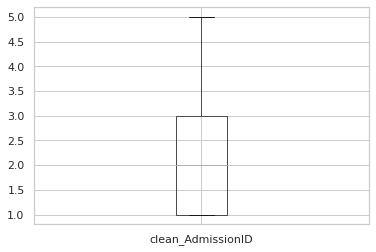

In [114]:
data_Admissions_Core_Diagnoses_Merge.boxplot();

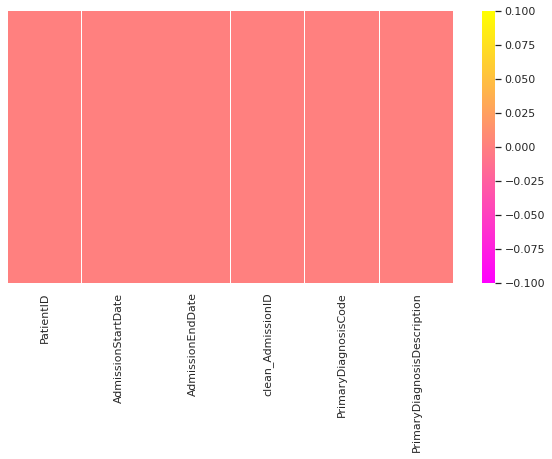

In [115]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_Admissions_Core_Diagnoses_Merge.isnull(),yticklabels=False,cbar=True,cmap='spring')

# --------------------------------------------------------------------------------------------------------------------

### 5) Merging the dataframe data_Admission_Core_Diagnoses_Merge with data_PatientsCorePopulatedTable

In [116]:
data_Patients_Core_Admission_Core_Diagnoses_Merge=pd.merge(data_Admissions_Core_Diagnoses_Merge,data_PatientCorePopulatedTable,on='PatientID',how='outer')
data_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5,M11.07,"Hydroxyapatite deposition disease, ankle and foot",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29
1,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1954-02-17 07:01:26.060,1954-03-08 12:51:04.183,1,D37.030,Neoplasm of uncertain behavior of the parotid ...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29
2,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1982-09-02 22:02:18.557,1982-09-15 00:04:09.627,2,F31.61,"Bipolar disorder, current episode mixed, mild",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29
3,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-05-12 14:58:45.493,2007-05-25 19:08:45.560,3,T82.21,Mechanical complication of coronary artery byp...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29
4,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-08-22 14:23:45.920,2007-08-25 18:11:13.533,4,C10.2,Malignant neoplasm of lateral wall of oropharynx,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29


In [117]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.tail()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
344295,DB495784-37B2-4185-8D66-B76E8374099D,2003-01-08 04:10:41.607,2003-01-26 23:58:39.680,4,M11.022,"Hydroxyapatite deposition disease, left elbow",Female,1921-12-14 01:35:12.387,White,Married,English,16.76
344296,DB495784-37B2-4185-8D66-B76E8374099D,2006-12-28 10:18:26.557,2007-01-13 00:07:55.090,5,M90.631,"Osteitis deformans in neoplastic diseases, rig...",Female,1921-12-14 01:35:12.387,White,Married,English,16.76
344297,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,1990-06-10 11:09:48.877,1990-06-22 23:40:16.407,1,C57.22,Malignant neoplasm of left round ligament,Female,1968-10-30 10:54:13.323,White,Unknown,English,11.27
344298,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2005-01-21 21:31:56.527,2005-02-02 01:23:26.260,2,C92.12,"Chronic myeloid leukemia, BCR/ABL-positive, in...",Female,1968-10-30 10:54:13.323,White,Unknown,English,11.27
344299,B7A09A1C-3648-4E28-A2A2-6B202E3BC39C,2009-04-10 21:56:04.437,2009-04-13 00:59:06.183,3,D32.0,Benign neoplasm of cerebral meninges,Female,1968-10-30 10:54:13.323,White,Unknown,English,11.27


### 5.1) Perform EDA

In [118]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(344300, 12)

In [119]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.size

4131600

In [120]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.dtypes

PatientID                                         object
AdmissionStartDate                                object
AdmissionEndDate                                  object
clean_AdmissionID                                  int64
PrimaryDiagnosisCode                              object
PrimaryDiagnosisDescription                       object
PatientGender                                     object
PatientDateOfBirth                                object
PatientRace                                       object
PatientMaritalStatus                              object
PatientLanguage                                   object
clean_PatientPopulationPercentageBelowPoverty    float64
dtype: object

In [121]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.columns

Index(['PatientID', 'AdmissionStartDate', 'AdmissionEndDate',
       'clean_AdmissionID', 'PrimaryDiagnosisCode',
       'PrimaryDiagnosisDescription', 'PatientGender', 'PatientDateOfBirth',
       'PatientRace', 'PatientMaritalStatus', 'PatientLanguage',
       'clean_PatientPopulationPercentageBelowPoverty'],
      dtype='object')

In [122]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            344290, 344291, 344292, 344293, 344294, 344295, 344296, 344297,
            344298, 344299],
           dtype='int64', length=344300)

In [123]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.count()

PatientID                                        344300
AdmissionStartDate                               344300
AdmissionEndDate                                 344300
clean_AdmissionID                                344300
PrimaryDiagnosisCode                             344300
PrimaryDiagnosisDescription                      344300
PatientGender                                    292643
PatientDateOfBirth                               292643
PatientRace                                      292643
PatientMaritalStatus                             292643
PatientLanguage                                  292643
clean_PatientPopulationPercentageBelowPoverty    292643
dtype: int64

In [124]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.duplicated().sum()

0

In [125]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.describe()

,clean_AdmissionID,clean_PatientPopulationPercentageBelowPoverty
count,344300.000000,292643.000000
mean,2.431920,14.613796
std,1.245759,3.304316
min,1.000000,5.060000
25%,1.000000,12.130000
50%,2.000000,14.750000
75%,3.000000,17.380000
max,5.000000,20.000000


In [126]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344300 entries, 0 to 344299
Data columns (total 12 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PatientID                                      344300 non-null  object 
 1   AdmissionStartDate                             344300 non-null  object 
 2   AdmissionEndDate                               344300 non-null  object 
 3   clean_AdmissionID                              344300 non-null  int64  
 4   PrimaryDiagnosisCode                           344300 non-null  object 
 5   PrimaryDiagnosisDescription                    344300 non-null  object 
 6   PatientGender                                  292643 non-null  object 
 7   PatientDateOfBirth                             292643 non-null  object 
 8   PatientRace                                    292643 non-null  object 
 9   PatientMaritalStatus                 

In [127]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,51657,51657,51657,51657,51657,51657


In [128]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.dropna(axis=0,inplace=True)

In [129]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,0,0,0,0,0,0


### 5.2) Checking for the outliers

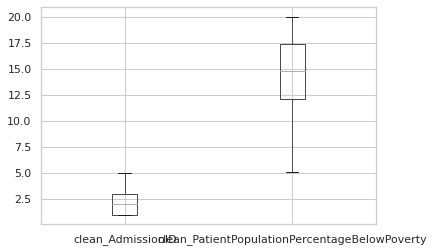

In [130]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.boxplot();

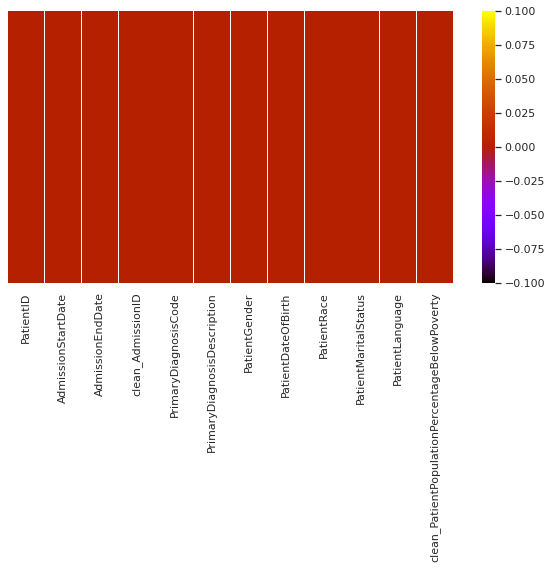

In [131]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_Patients_Core_Admission_Core_Diagnoses_Merge.isnull(),yticklabels=False,cbar=True,cmap='gnuplot')

## 6) LabsCorePopulatedTable

## Import the required packages

In [132]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from collections import Counter,namedtuple,defaultdict,OrderedDict
import warnings
warnings.filterwarnings('ignore')

### 6.1) Load the dataset

In [133]:
data_LabsCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/LabsCorePopulatedTable.txt",sep='\t',nrows=9999)
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000


In [134]:
data_LabsCorePopulatedTable.shape

(9999, 6)

In [135]:
data_LabsCorePopulatedTable.size

59994

In [136]:
data_LabsCorePopulatedTable.dtypes

PatientID       object
AdmissionID      int64
LabName         object
LabValue       float64
LabUnits        object
LabDateTime     object
dtype: object

In [137]:
data_LabsCorePopulatedTable.columns

Index(['PatientID', 'AdmissionID', 'LabName', 'LabValue', 'LabUnits',
       'LabDateTime'],
      dtype='object')

In [138]:
data_LabsCorePopulatedTable.index

RangeIndex(start=0, stop=9999, step=1)

In [139]:
data_LabsCorePopulatedTable.count()

PatientID      9999
AdmissionID    9999
LabName        9999
LabValue       9999
LabUnits       9999
LabDateTime    9999
dtype: int64

In [140]:
data_LabsCorePopulatedTable.duplicated().sum()

0

In [141]:
data_LabsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PatientID    9999 non-null   object 
 1   AdmissionID  9999 non-null   int64  
 2   LabName      9999 non-null   object 
 3   LabValue     9999 non-null   float64
 4   LabUnits     9999 non-null   object 
 5   LabDateTime  9999 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.8+ KB


In [142]:
data_LabsCorePopulatedTable.describe()

,AdmissionID,LabValue
count,9999.000000,9999.000000
mean,2.409641,34.954745
std,1.172555,58.702104
min,1.000000,0.000000
25%,2.000000,3.200000
50%,2.000000,10.700000
75%,3.000000,37.700000
max,6.000000,448.900000


In [143]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,0,0,0,0,0,0


### 6.2) Checking for the outliers

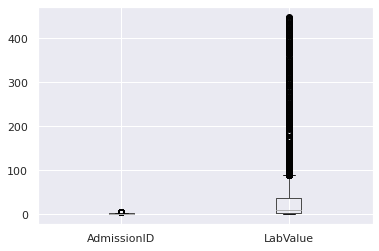

In [144]:
data_LabsCorePopulatedTable.boxplot();

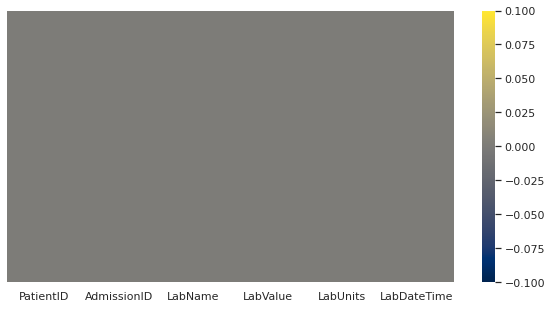

In [145]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_LabsCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='cividis')

### 6.3) Removing the outliers

In [146]:
X=data_LabsCorePopulatedTable.AdmissionID
X.head(5)

0    1
1    1
2    1
3    1
4    1
Name: AdmissionID, dtype: int64

Text(0.5, 0, 'AdmissionID')

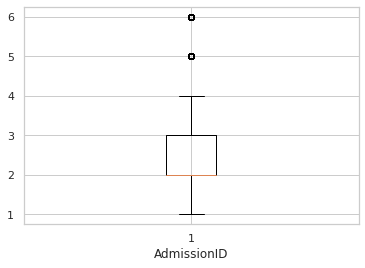

In [147]:
plt.boxplot(data_LabsCorePopulatedTable['AdmissionID']);
plt.xlabel('AdmissionID')

In [148]:
remove_outliers_AdmissionID=X.between(X.quantile(0.05),X.quantile(0.9))
remove_outliers_AdmissionID.head()

0    True
1    True
2    True
3    True
4    True
Name: AdmissionID, dtype: bool

In [149]:
print(str(X[remove_outliers_AdmissionID].size)+"/"+str(X.size) + " remaining data points")

9410/9999 remaining data points


Text(0.5, 0, 'AdmissionID')

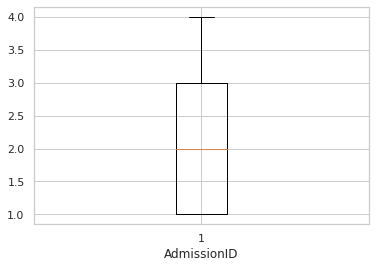

In [150]:
plt.boxplot(X[remove_outliers_AdmissionID])
plt.xlabel("AdmissionID")

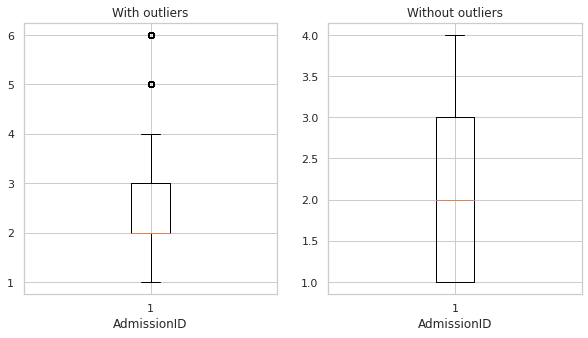

In [151]:
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("AdmissionID")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("AdmissionID")
axis[1].boxplot(X[remove_outliers_AdmissionID]);

In [152]:
data_LabsCorePopulatedTable['clean_AdmissionID']=X[remove_outliers_AdmissionID]
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime,clean_AdmissionID
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000,1.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000,1.0
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000,1.0
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000,1.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000,1.0


Text(0.5, 0, 'LabValue')

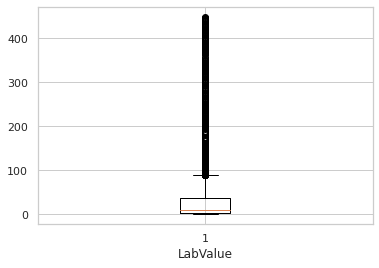

In [153]:
plt.boxplot(data_LabsCorePopulatedTable['LabValue']);
plt.xlabel('LabValue')

In [154]:
X=data_LabsCorePopulatedTable.LabValue
X.head(10)

0     40.0
1      0.9
2    134.2
3     15.0
4      2.8
5      0.5
6      9.2
7      1.0
8      7.0
9      3.0
Name: LabValue, dtype: float64

In [155]:
remove_outliers_LabValue=X.between(X.quantile(0.45),X.quantile(0.9))
remove_outliers_LabValue.head()

0     True
1    False
2    False
3     True
4    False
Name: LabValue, dtype: bool

In [156]:
print(str(X[remove_outliers_LabValue].size)+"/"+str(X.size) + " remaining data points")

4505/9999 remaining data points


Text(0.5, 0, 'LabValue')

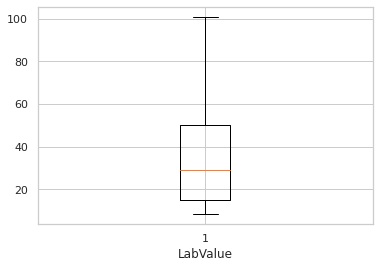

In [157]:
plt.boxplot(X[remove_outliers_LabValue])
plt.xlabel("LabValue")

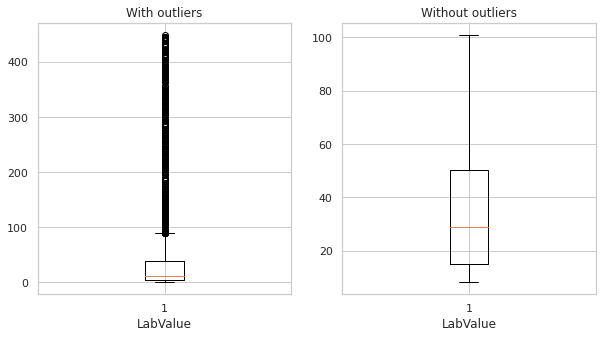

In [158]:
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("LabValue")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("LabValue")
axis[1].boxplot(X[remove_outliers_LabValue]);

In [159]:
data_LabsCorePopulatedTable['clean_LabValue']=X[remove_outliers_LabValue]

In [160]:
data_LabsCorePopulatedTable.drop(labels=['AdmissionID','LabValue'],axis=1,inplace=True)

In [161]:
data_LabsCorePopulatedTable.head()

,PatientID,LabName,LabUnits,LabDateTime,clean_AdmissionID,clean_LabValue
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALT/SGPT,U/L,1974-01-11 21:10:51.930000000,1.0,40.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: MONOCYTES,k/cumm,1974-01-11 03:14:30.127000000,1.0,NaN
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: GLUCOSE,mg/dL,1974-01-11 13:57:06.970000000,1.0,NaN
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: RDW,%,1974-01-11 02:10:43.437000000,1.0,15.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALBUMIN,gm/dL,1974-01-11 18:50:32.400000000,1.0,NaN


In [162]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,LabName,LabUnits,LabDateTime,clean_AdmissionID,clean_LabValue
0,0,0,0,0,589,5494


In [163]:
data_LabsCorePopulatedTable.shape

(9999, 6)

In [164]:
data_LabsCorePopulatedTable.size

59994

In [165]:
data_LabsCorePopulatedTable.dropna(axis=0,inplace=True)

In [166]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,LabName,LabUnits,LabDateTime,clean_AdmissionID,clean_LabValue
0,0,0,0,0,0,0


In [167]:
data_LabsCorePopulatedTable.shape

(4224, 6)

In [168]:
data_LabsCorePopulatedTable.size

25344

In [169]:
data_LabsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4224 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          4224 non-null   object 
 1   LabName            4224 non-null   object 
 2   LabUnits           4224 non-null   object 
 3   LabDateTime        4224 non-null   object 
 4   clean_AdmissionID  4224 non-null   float64
 5   clean_LabValue     4224 non-null   float64
dtypes: float64(2), object(4)
memory usage: 231.0+ KB


### 6.4) Segreggating the lab data with respect to various parameters

In [170]:
data_AdmissionID=data_LabsCorePopulatedTable.groupby(['clean_AdmissionID'])['PatientID'].count()
data_AdmissionID

clean_AdmissionID
1.0    1085
2.0    1516
3.0    1262
4.0     361
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Admission ID')

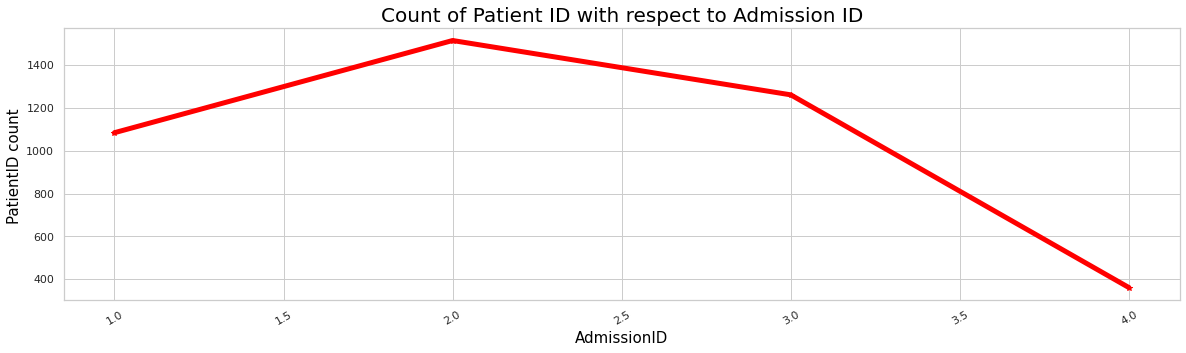

In [171]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_AdmissionID,color='red',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("AdmissionID",fontsize=15,color='black')
plt.ylabel("PatientID count ",fontsize=15,color='black')
plt.title("Count of Patient ID with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

In [172]:
data_LabName=data_LabsCorePopulatedTable.groupby(['LabName'])['clean_AdmissionID'].count()
data_LabName

LabName
CBC: ABSOLUTE LYMPHOCYTES       257
CBC: ABSOLUTE NEUTROPHILS       249
CBC: HEMATOCRIT                 270
CBC: HEMOGLOBIN                 263
CBC: MCH                        269
CBC: MCHC                       269
CBC: MEAN CORPUSCULAR VOLUME    277
CBC: NEUTROPHILS                 66
CBC: RDW                        275
CBC: WHITE BLOOD CELL COUNT     117
METABOLIC: ALK PHOS             144
METABOLIC: ALT/SGPT             275
METABOLIC: ANION GAP            166
METABOLIC: AST/SGOT             261
METABOLIC: BUN                  232
METABOLIC: CALCIUM              203
METABOLIC: CARBON DIOXIDE       275
METABOLIC: CHLORIDE             117
METABOLIC: GLUCOSE              138
METABOLIC: TOTAL PROTEIN        101
Name: clean_AdmissionID, dtype: int64

Text(0.5, 1.0, 'Count of Admission ID with respect to Lab Name ')

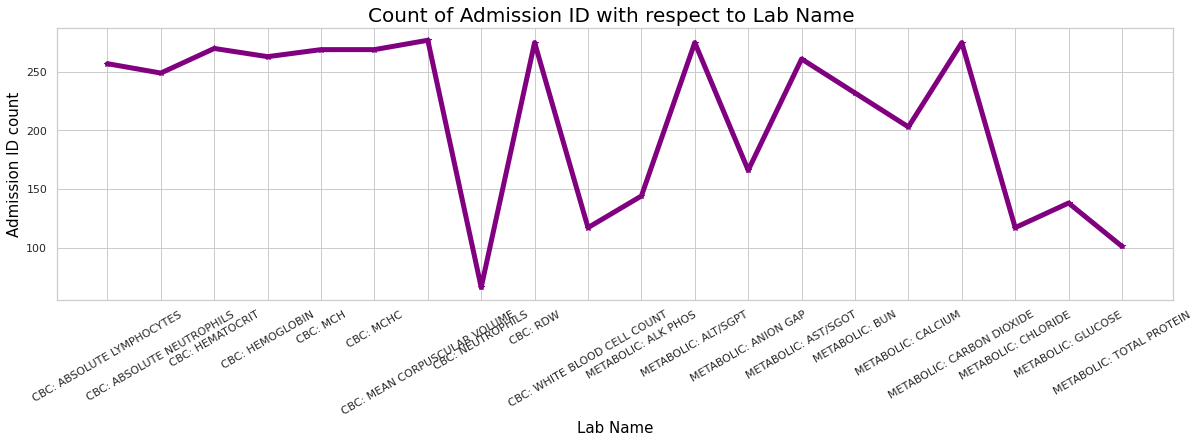

In [173]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabName,color='purple',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Lab Name",fontsize=15,color='black')
plt.ylabel("Admission ID count",fontsize=15,color='black')
plt.title("Count of Admission ID with respect to Lab Name ",fontdict={'fontsize':20,'color':'black'})

In [174]:
data_LabValue=data_LabsCorePopulatedTable.groupby(['clean_AdmissionID'])['clean_LabValue'].count()
data_LabValue

clean_AdmissionID
1.0    1085
2.0    1516
3.0    1262
4.0     361
Name: clean_LabValue, dtype: int64

Text(0.5, 1.0, 'Count of Lab Value with respect to Admission ID ')

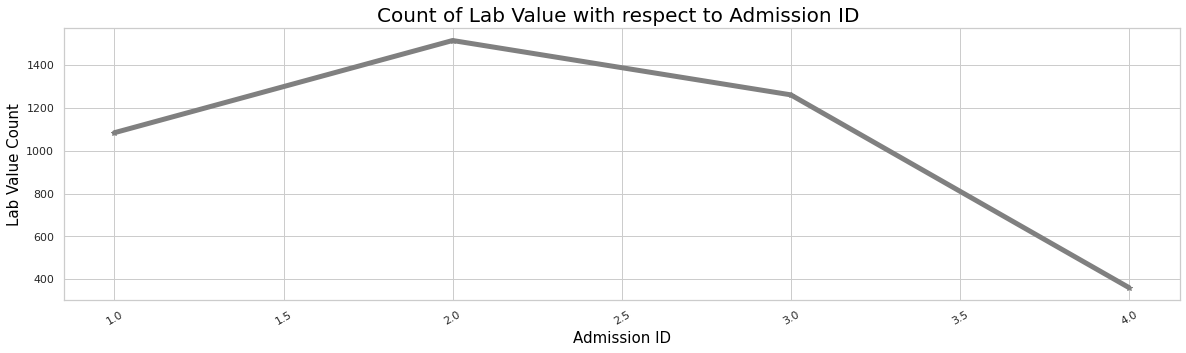

In [175]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabValue,color='grey',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Lab Value Count",fontsize=15,color='black')
plt.title("Count of Lab Value with respect to Admission ID ",fontdict={'fontsize':20,'color':'black'})

In [176]:
data_LabUnits=data_LabsCorePopulatedTable.groupby(['clean_AdmissionID'])['LabUnits'].count()
data_LabUnits

clean_AdmissionID
1.0    1085
2.0    1516
3.0    1262
4.0     361
Name: LabUnits, dtype: int64

Text(0.5, 1.0, 'Count of Lab Units with respect to Admission ID ')

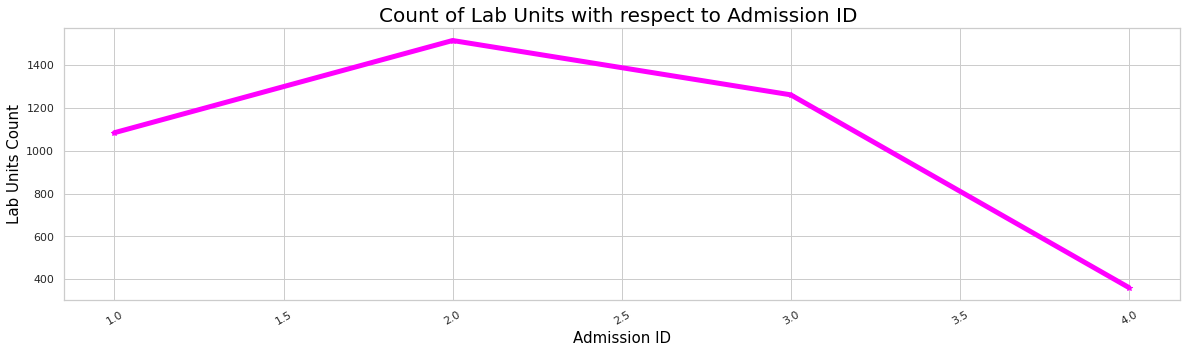

In [177]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabUnits,color='magenta',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Lab Units Count",fontsize=15,color='black')
plt.title("Count of Lab Units with respect to Admission ID ",fontdict={'fontsize':20,'color':'black'})

In [178]:
data_LabUnits1=data_LabsCorePopulatedTable.groupby(['LabUnits'])['clean_AdmissionID'].count()
data_LabUnits1

LabUnits
%         1051
U/L        680
fl         277
g/dl       269
gm/dL      101
gm/dl      263
k/cumm     183
mg/dL      573
mmol/L     558
pg         269
Name: clean_AdmissionID, dtype: int64

Text(0.5, 1.0, 'Count of Admission ID with respect to Lab Units ')

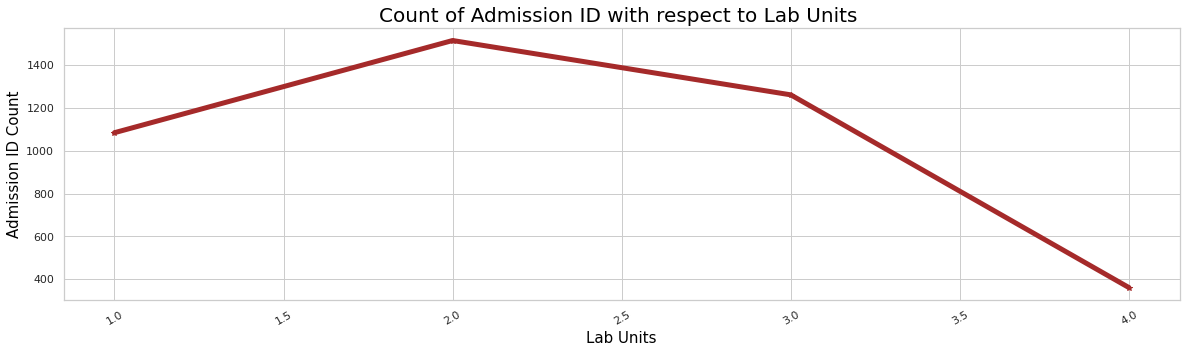

In [179]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabValue,color='brown',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Lab Units",fontsize=15,color='black')
plt.ylabel("Admission ID Count",fontsize=15,color='black')
plt.title("Count of Admission ID with respect to Lab Units ",fontdict={'fontsize':20,'color':'black'})

## 7) Merging LabsCorePopulatedTable with data_Patients_Core_Admission_Core_Diagnoses_Merge

In [180]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge=pd.merge(data_Patients_Core_Admission_Core_Diagnoses_Merge,data_LabsCorePopulatedTable,on=['PatientID','clean_AdmissionID'],how='outer')
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5,M11.07,"Hydroxyapatite deposition disease, ankle and foot",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29,NaN,NaN,NaN,NaN
1,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1954-02-17 07:01:26.060,1954-03-08 12:51:04.183,1,D37.030,Neoplasm of uncertain behavior of the parotid ...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29,NaN,NaN,NaN,NaN
2,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1982-09-02 22:02:18.557,1982-09-15 00:04:09.627,2,F31.61,"Bipolar disorder, current episode mixed, mild",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29,NaN,NaN,NaN,NaN
3,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-05-12 14:58:45.493,2007-05-25 19:08:45.560,3,T82.21,Mechanical complication of coronary artery byp...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29,NaN,NaN,NaN,NaN
4,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-08-22 14:23:45.920,2007-08-25 18:11:13.533,4,C10.2,Malignant neoplasm of lateral wall of oropharynx,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,5.29,NaN,NaN,NaN,NaN


In [181]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.tail()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
296830,B7603541-D030-494C-AF63-50CF71632299,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METABOLIC: ALK PHOS,U/L,2009-04-11 19:50:15.570000000,55.6
296831,B7603541-D030-494C-AF63-50CF71632299,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METABOLIC: BUN,mg/dL,2009-04-12 02:10:33.303000000,16.3
296832,B7603541-D030-494C-AF63-50CF71632299,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METABOLIC: CALCIUM,mg/dL,2009-04-12 01:22:00.880000000,10.6
296833,B7603541-D030-494C-AF63-50CF71632299,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METABOLIC: ANION GAP,mmol/L,2009-04-12 02:00:58.330000000,10.9
296834,B7603541-D030-494C-AF63-50CF71632299,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METABOLIC: CHLORIDE,mmol/L,2009-04-12 00:34:19.663000000,95.6


## 7.1) Perform EDA

In [182]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(296835, 16)

In [183]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.size

4749360

In [184]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.dtypes

PatientID                                         object
AdmissionStartDate                                object
AdmissionEndDate                                  object
clean_AdmissionID                                  int64
PrimaryDiagnosisCode                              object
PrimaryDiagnosisDescription                       object
PatientGender                                     object
PatientDateOfBirth                                object
PatientRace                                       object
PatientMaritalStatus                              object
PatientLanguage                                   object
clean_PatientPopulationPercentageBelowPoverty    float64
LabName                                           object
LabUnits                                          object
LabDateTime                                       object
clean_LabValue                                   float64
dtype: object

In [185]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.columns

Index(['PatientID', 'AdmissionStartDate', 'AdmissionEndDate',
       'clean_AdmissionID', 'PrimaryDiagnosisCode',
       'PrimaryDiagnosisDescription', 'PatientGender', 'PatientDateOfBirth',
       'PatientRace', 'PatientMaritalStatus', 'PatientLanguage',
       'clean_PatientPopulationPercentageBelowPoverty', 'LabName', 'LabUnits',
       'LabDateTime', 'clean_LabValue'],
      dtype='object')

In [186]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.count()

PatientID                                        296835
AdmissionStartDate                               296417
AdmissionEndDate                                 296417
clean_AdmissionID                                296835
PrimaryDiagnosisCode                             296417
PrimaryDiagnosisDescription                      296417
PatientGender                                    296417
PatientDateOfBirth                               296417
PatientRace                                      296417
PatientMaritalStatus                             296417
PatientLanguage                                  296417
clean_PatientPopulationPercentageBelowPoverty    296417
LabName                                            4224
LabUnits                                           4224
LabDateTime                                        4224
clean_LabValue                                     4224
dtype: int64

In [187]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.duplicated().sum()

0

In [188]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            296825, 296826, 296827, 296828, 296829, 296830, 296831, 296832,
            296833, 296834],
           dtype='int64', length=296835)

In [189]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296835 entries, 0 to 296834
Data columns (total 16 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PatientID                                      296835 non-null  object 
 1   AdmissionStartDate                             296417 non-null  object 
 2   AdmissionEndDate                               296417 non-null  object 
 3   clean_AdmissionID                              296835 non-null  int64  
 4   PrimaryDiagnosisCode                           296417 non-null  object 
 5   PrimaryDiagnosisDescription                    296417 non-null  object 
 6   PatientGender                                  296417 non-null  object 
 7   PatientDateOfBirth                             296417 non-null  object 
 8   PatientRace                                    296417 non-null  object 
 9   PatientMaritalStatus                 

In [190]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.describe()

,clean_AdmissionID,clean_PatientPopulationPercentageBelowPoverty,clean_LabValue
count,296835.000000,296417.000000,4224.000000
mean,2.428733,14.599791,36.483807
std,1.242078,3.300364,26.220244
min,1.000000,5.060000,8.300000
25%,1.000000,12.140000,14.975000
50%,2.000000,14.740000,29.050000
75%,3.000000,17.350000,50.200000
max,5.000000,20.000000,100.900000


In [191]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
0,0,418,418,0,418,418,418,418,418,418,418,418,292611,292611,292611,292611


In [192]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.dropna(axis=0,inplace=True)

In [193]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(3806, 16)

In [195]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.size

60896

### 7.2) Detecting Outliers

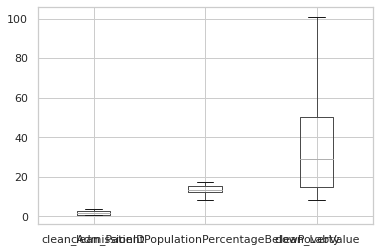

In [196]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.boxplot();

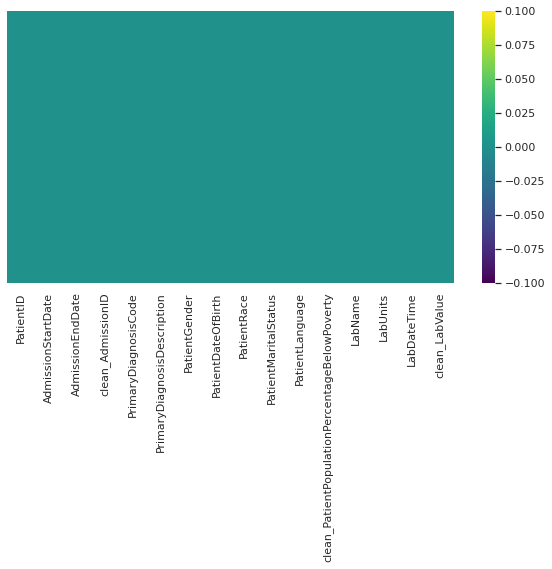

In [197]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### 7.3) Use Label Encoder to convert categorical data into numerical

In [198]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 3145 to 83009
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PatientID                                      3806 non-null   object 
 1   AdmissionStartDate                             3806 non-null   object 
 2   AdmissionEndDate                               3806 non-null   object 
 3   clean_AdmissionID                              3806 non-null   int64  
 4   PrimaryDiagnosisCode                           3806 non-null   object 
 5   PrimaryDiagnosisDescription                    3806 non-null   object 
 6   PatientGender                                  3806 non-null   object 
 7   PatientDateOfBirth                             3806 non-null   object 
 8   PatientRace                                    3806 non-null   object 
 9   PatientMaritalStatus                           3

## Using Label Encoding to convert categorical data into numerical

In [199]:
from sklearn.preprocessing import LabelEncoder

In [200]:
enc=LabelEncoder()
a=['PatientID','AdmissionStartDate','AdmissionEndDate','PrimaryDiagnosisCode',
   'PrimaryDiagnosisDescription','PatientGender','PatientDateOfBirth','PatientMaritalStatus','PatientRace',
  'PatientLanguage','LabName','LabUnits','LabDateTime']
for i in a:
    data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge[[i]]=enc.fit_transform(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge[i])

In [201]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 3145 to 83009
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PatientID                                      3806 non-null   int64  
 1   AdmissionStartDate                             3806 non-null   int64  
 2   AdmissionEndDate                               3806 non-null   int64  
 3   clean_AdmissionID                              3806 non-null   int64  
 4   PrimaryDiagnosisCode                           3806 non-null   int64  
 5   PrimaryDiagnosisDescription                    3806 non-null   int64  
 6   PatientGender                                  3806 non-null   int64  
 7   PatientDateOfBirth                             3806 non-null   int64  
 8   PatientRace                                    3806 non-null   int64  
 9   PatientMaritalStatus                           3

# -----------------------------------------------------------------------------------------------------------

### Generating the correlation matrix

In [202]:
corr=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.corr()

In [203]:
corr

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
PatientID,1.000000,-0.007359,-0.007359,-0.221712,0.037432,0.108531,-0.299700,-0.032495,-0.484638,-0.090831,0.510215,0.460805,-0.011020,0.008193,-0.002264,-0.003330
AdmissionStartDate,-0.007359,1.000000,1.000000,0.563883,0.030290,0.023798,-0.176643,0.345603,0.034492,0.297327,-0.214129,0.182038,-0.009112,-0.005493,0.994392,0.009394
AdmissionEndDate,-0.007359,1.000000,1.000000,0.563883,0.030290,0.023798,-0.176643,0.345603,0.034492,0.297327,-0.214129,0.182038,-0.009112,-0.005493,0.994392,0.009394
clean_AdmissionID,-0.221712,0.563883,0.563883,1.000000,0.068692,-0.062758,0.097439,-0.142067,0.119580,-0.085202,-0.071291,-0.016052,0.001735,0.002302,0.566208,-0.004457
PrimaryDiagnosisCode,0.037432,0.030290,0.030290,0.068692,1.000000,-0.005627,0.346333,-0.304311,-0.247155,0.156793,0.219288,0.059622,0.010424,0.009646,0.049142,-0.017169
PrimaryDiagnosisDescription,0.108531,0.023798,0.023798,-0.062758,-0.005627,1.000000,-0.036411,-0.039014,-0.277697,0.145194,0.149828,0.029384,-0.011263,-0.003893,-0.000436,0.012211
PatientGender,-0.299700,-0.176643,-0.176643,0.097439,0.346333,-0.036411,1.000000,-0.083593,-0.350394,-0.157219,-0.131034,0.037947,0.032350,0.011159,-0.167075,-0.017513
PatientDateOfBirth,-0.032495,0.345603,0.345603,-0.142067,-0.304311,-0.039014,-0.083593,1.000000,-0.158463,0.209003,-0.551919,0.357378,0.000103,-0.011727,0.340467,0.020880
PatientRace,-0.484638,0.034492,0.034492,0.119580,-0.247155,-0.277697,-0.350394,-0.158463,1.000000,-0.172576,-0.271147,-0.284388,-0.010084,-0.017890,0.025197,0.007747
PatientMaritalStatus,-0.090831,0.297327,0.297327,-0.085202,0.156793,0.145194,-0.157219,0.209003,-0.172576,1.000000,-0.422798,-0.440760,-0.011249,-0.008548,0.317891,-0.001578


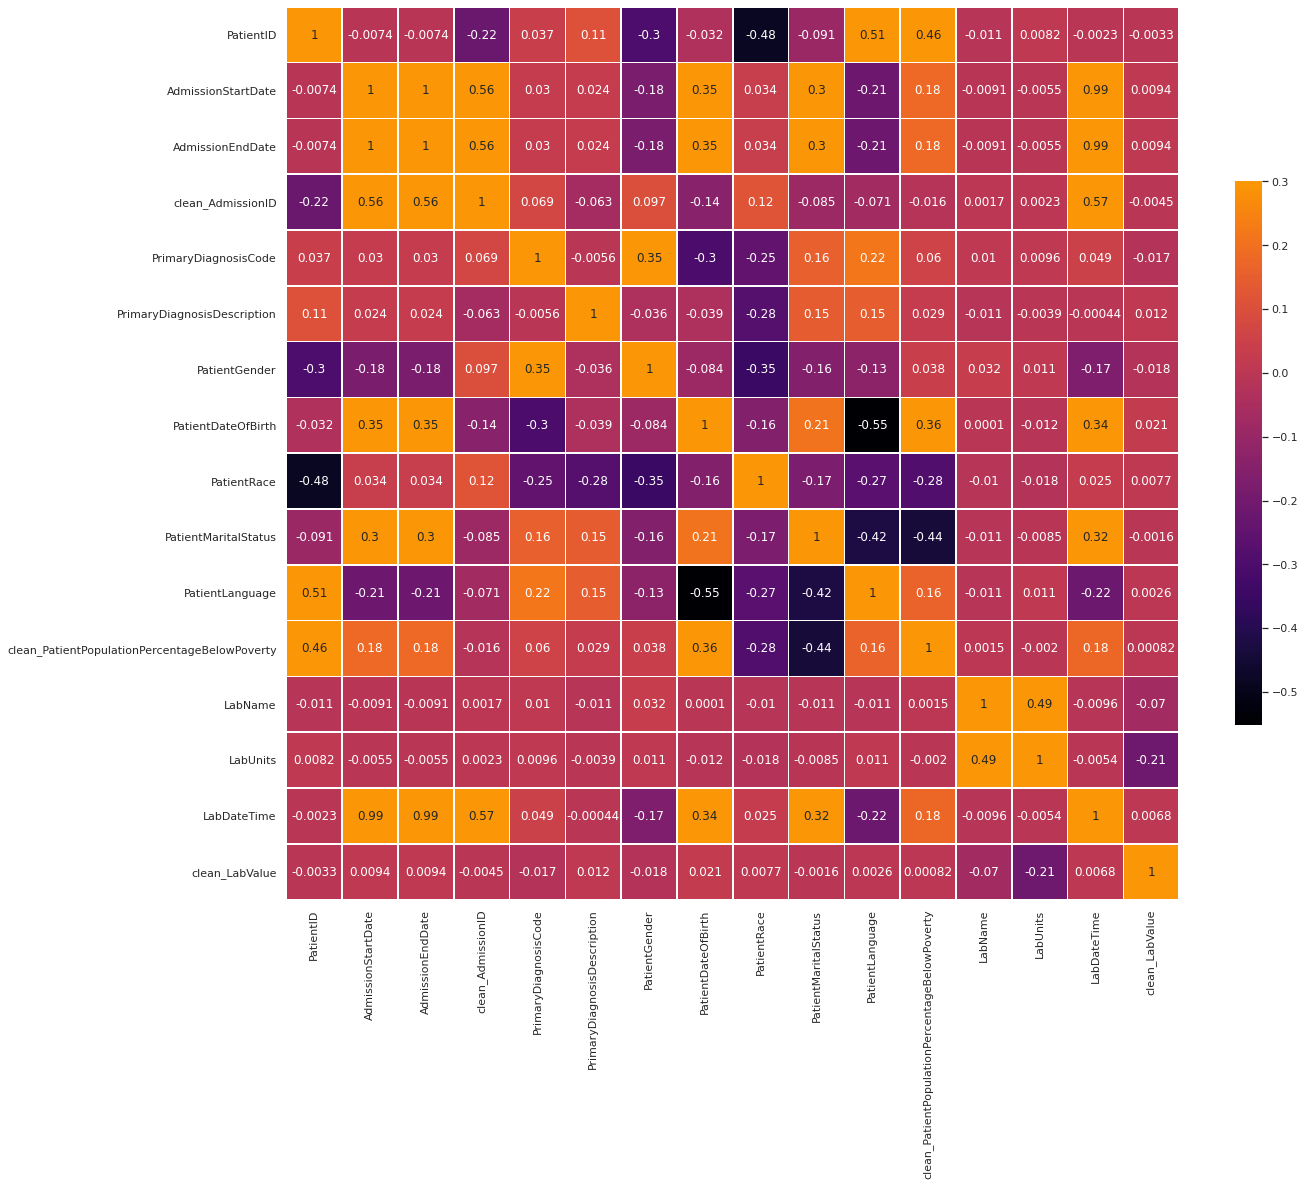

In [204]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='inferno',vmax=.3,center=0,square=True,linewidths=.6,cbar_kws={'shrink':.5},annot=True)

## Finding the correlation with respect to AdmissionID/diagnoses group and Lab prescribed

## Correlations of PatientID with all the other parameters

In [205]:
print('Correlation of Patient ID with respect to Admission ID = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_AdmissionID']))

Correlation of Patient ID with respect to Admission ID = 
-0.22171207454104214


In [206]:
print('Correlation of Patient ID with respect to Admission Start Date = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['AdmissionStartDate']))

Correlation of Patient ID with respect to Admission Start Date = 
-0.007358822362884423


In [207]:
print('Correlation of Patient ID with respect to Admission End Date = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['AdmissionEndDate']))

Correlation of Patient ID with respect to Admission End Date = 
-0.007358822362884423


In [208]:
print('Correlation of Patient ID with respect to Primary Diagnosis Code = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisCode']))

Correlation of Patient ID with respect to Primary Diagnosis Code = 
0.037431878425939764


In [209]:
print('Correlation of Patient ID with respect to Primary Diagnosis Description = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisDescription']))

Correlation of Patient ID with respect to Primary Diagnosis Description = 
0.10853124629431651


In [210]:
print('Correlation of Patient ID with respect to Patient Gender = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientGender']))

Correlation of Patient ID with respect to Patient Gender = 
-0.2996999744566294


In [211]:
print('Correlation of Patient ID with respect to Patient Date Of Birth = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth']))

Correlation of Patient ID with respect to Patient Date Of Birth = 
-0.03249477939875849


In [212]:
print('Correlation of Patient ID with respect to Patient Race = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientRace']))

Correlation of Patient ID with respect to Patient Race = 
-0.4846382444795618


In [213]:
print('Correlation of Patient ID with respect to Patient Marital Status = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientMaritalStatus']))

Correlation of Patient ID with respect to Patient Marital Status = 
-0.09083097473371254


In [214]:
print('Correlation of Patient ID with respect to Patient Language = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientLanguage']))

Correlation of Patient ID with respect to Patient Language = 
0.51021497706153


In [215]:
print('Correlation of Patient ID with respect to Patient Population Percentage Below Poverty = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_PatientPopulationPercentageBelowPoverty']))

Correlation of Patient ID with respect to Patient Population Percentage Below Poverty = 
0.4608051280835046


In [216]:
print('Correlation of Patient ID with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Patient ID with respect to Lab Name = 
-0.011020240235792702


In [217]:
print('Correlation of Patient ID with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Patient ID with respect to Lab Value = 
-0.0033298722196859858


In [218]:
print('Correlation of Patient ID with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Patient ID with respect to Lab Units = 
0.008193133843819915


In [219]:
print('Correlation of Patient ID with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Patient ID with respect to Lab Date Time = 
-0.0022635191374291096


## Finding correlation between Admissions Diagnoses group and Lab group

### 1) Correlation of AdmissionID

In [220]:
print('Correlation of Admission ID with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_AdmissionID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Admission ID with respect to Lab Name = 
0.0017347202840189173


In [221]:
print('Correlation of Admission ID with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_AdmissionID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Admission ID with respect to Lab Value = 
-0.0044571410877245745


In [222]:
print('Correlation of Admission ID with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_AdmissionID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Admission ID with respect to Lab Units = 
0.002301961553335187


In [223]:
print('Correlation of Admission ID with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_AdmissionID'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Admission ID with respect to Lab Date Time = 
0.5662075949892713


### 2) Correlation of Primary Diagnosis Code

In [224]:
print('Correlation of Primary Diagnosis Code with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisCode'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Primary Diagnosis Code with respect to Lab Name = 
0.010424131841169419


In [225]:
print('Correlation of Primary Diagnosis Code with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisCode'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Primary Diagnosis Code with respect to Lab Value = 
-0.01716866218525589


In [226]:
print('Correlation of Primary Diagnosis Code with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisCode'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Primary Diagnosis Code with respect to Lab Units = 
0.009645581528389605


In [227]:
print('Correlation of Primary Diagnosis Code with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisCode'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Primary Diagnosis Code with respect to Lab Date Time = 
0.049141506887857386


### 3) Correlation of Primary Diagnosis Description

In [228]:
print('Correlation of Primary Diagnosis Description with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisDescription'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Primary Diagnosis Description with respect to Lab Name = 
-0.01126286030512846


In [229]:
print('Correlation of Primary Diagnosis Description with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisDescription'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Primary Diagnosis Description with respect to Lab Value = 
0.012211297710245176


In [230]:
print('Correlation of Primary Diagnosis Description with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisDescription'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Primary Diagnosis Description with respect to Lab Units = 
-0.003893387818941346


In [231]:
print('Correlation of Primary Diagnosis Description with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PrimaryDiagnosisDescription'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Primary Diagnosis Description with respect to Lab Date Time = 
-0.0004358969540684486


## Finding Correlations of Patients data with respect to lab group 

### 1) Correlation of PatientGender

In [232]:
print('Correlation of Patient Gender with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientGender'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Patient Gender with respect to Lab Name = 
0.03235032748385872


In [233]:
print('Correlation of Patient Gender with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientGender'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Patient Gender with respect to Lab Value = 
-0.01751280899311683


In [234]:
print('Correlation of Patient Gender with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientGender'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Patient Gender with respect to Lab Units = 
0.011158981449977507


In [235]:
print('Correlation of Patient Gender with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientGender'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Patient Gender with respect to Lab Date Time = 
-0.16707470772759445


### 2) Correlation of Patient Date Of Birth

In [236]:
print('Correlation of Patient Date Of Birth with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Patient Date Of Birth with respect to Lab Name = 
0.00010323122547481398


In [237]:
print('Correlation of Patient Date Of Birth with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Patient Date Of Birth with respect to Lab Value = 
0.02087975159578269


In [238]:
print('Correlation of Patient Date Of Birth with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Patient Date Of Birth with respect to Lab Units = 
-0.01172730268112396


In [239]:
print('Correlation of Patient Date Of Birth with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientDateOfBirth'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Patient Date Of Birth with respect to Lab Date Time = 
0.3404670962067512


### 3) Correlation of Patient Race

In [240]:
print('Correlation of Patient Race to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientRace'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Patient Race to Lab Name = 
-0.010083725762823705


In [241]:
print('Correlation of Patient Race to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientRace'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Patient Race to Lab Value = 
0.007746675151914733


In [242]:
print('Correlation of Patient Race to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientRace'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Patient Race to Lab Units = 
-0.017889713583854088


In [243]:
print('Correlation of Patient Race to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientRace'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Patient Race to Lab Date Time = 
0.025196647186744563


### 4) Correlation of Patient Marital Status

In [244]:
print('Correlation of Patient Marital Status with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientMaritalStatus'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Patient Marital Status with respect to Lab Name = 
-0.011249445425870057


In [245]:
print('Correlation of Patient Marital Status with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientMaritalStatus'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Patient Marital Status with respect to Lab Value = 
-0.0015781179504005098


In [246]:
print('Correlation of Patient Marital Status with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientMaritalStatus'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Patient Marital Status with respect to Lab Units = 
-0.008547691134977513


In [247]:
print('Correlation of Patient Marital Status with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientMaritalStatus'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Patient Marital Status with respect to Lab Date Time = 
0.31789088666063786


### 5) Correlation of Patient Language

In [248]:
print('Correlation of Patient Language with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientLanguage'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Patient Language with respect to Lab Name = 
-0.011167401029501586


In [249]:
print('Correlation of Patient Language with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientLanguage'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Patient Language with respect to Lab Value = 
0.002576259344492322


In [250]:
print('Correlation of Patient Language with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientLanguage'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Patient Language with respect to Lab Units = 
0.010781888510107923


In [251]:
print('Correlation of Patient Language with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['PatientLanguage'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Patient Language with respect to Lab Date Time = 
-0.2178432789736548


### 6) Correlation of Patient Population Percentage Below Poverty

In [252]:
print('Correlation of Patient Population Percentage Below Poverty with respect to Lab Name = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_PatientPopulationPercentageBelowPoverty'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabName']))

Correlation of Patient Population Percentage Below Poverty with respect to Lab Name = 
0.0014894646916784153


In [253]:
print('Correlation of Patient Population Percentage Below Poverty with respect to Lab Value = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_PatientPopulationPercentageBelowPoverty'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']))

Correlation of Patient Population Percentage Below Poverty with respect to Lab Value = 
0.0008213204139349098


In [254]:
print('Correlation of Patient Population Percentage Below Poverty with respect to Lab Units = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_PatientPopulationPercentageBelowPoverty'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']))

Correlation of Patient Population Percentage Below Poverty with respect to Lab Units = 
-0.0019870754633856333


In [255]:
print('Correlation of Patient Population Percentage Below Poverty with respect to Lab Date Time = ')
print(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_PatientPopulationPercentageBelowPoverty'].corr(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabDateTime']))

Correlation of Patient Population Percentage Below Poverty with respect to Lab Date Time = 
0.17779140972519414


# ------------------------------------------------------------------------------------------------------

In [256]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 3145 to 83009
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PatientID                                      3806 non-null   int64  
 1   AdmissionStartDate                             3806 non-null   int64  
 2   AdmissionEndDate                               3806 non-null   int64  
 3   clean_AdmissionID                              3806 non-null   int64  
 4   PrimaryDiagnosisCode                           3806 non-null   int64  
 5   PrimaryDiagnosisDescription                    3806 non-null   int64  
 6   PatientGender                                  3806 non-null   int64  
 7   PatientDateOfBirth                             3806 non-null   int64  
 8   PatientRace                                    3806 non-null   int64  
 9   PatientMaritalStatus                           3

In [257]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue'].astype('int')

In [258]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabResults']=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['clean_LabValue']+data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabUnits']

In [259]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabResults']=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge['LabResults'].astype('int')

In [260]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head(5)

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue,LabResults
3145,8,1,1,1,19,11,1,1,2,1,0,11.68,11,1,87,40,41
3146,8,1,1,1,19,11,1,1,2,1,0,11.68,8,0,85,15,15
3147,8,1,1,1,19,11,1,1,2,1,0,11.68,9,6,86,9,15
3148,8,1,1,1,19,11,1,1,2,1,0,11.68,4,9,89,36,45
3149,8,1,1,1,19,11,1,1,2,1,0,11.68,15,7,91,8,15


In [261]:

data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.to_csv("Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.csv")

In [262]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge=pd.read_csv("Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.csv",nrows=9999)
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,Unnamed: 0,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue,LabResults
0,3145,8,1,1,1,19,11,1,1,2,1,0,11.68,11,1,87,40,41
1,3146,8,1,1,1,19,11,1,1,2,1,0,11.68,8,0,85,15,15
2,3147,8,1,1,1,19,11,1,1,2,1,0,11.68,9,6,86,9,15
3,3148,8,1,1,1,19,11,1,1,2,1,0,11.68,4,9,89,36,45
4,3149,8,1,1,1,19,11,1,1,2,1,0,11.68,15,7,91,8,15


In [263]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     3806 non-null   int64  
 1   PatientID                                      3806 non-null   int64  
 2   AdmissionStartDate                             3806 non-null   int64  
 3   AdmissionEndDate                               3806 non-null   int64  
 4   clean_AdmissionID                              3806 non-null   int64  
 5   PrimaryDiagnosisCode                           3806 non-null   int64  
 6   PrimaryDiagnosisDescription                    3806 non-null   int64  
 7   PatientGender                                  3806 non-null   int64  
 8   PatientDateOfBirth                             3806 non-null   int64  
 9   PatientRace                                    3806 

### Define X and y variables

In [264]:
X=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.loc[:,['PatientGender','PatientDateOfBirth',
                                                             'PatientRace','LabResults','PrimaryDiagnosisDescription','LabName']]
X.head(20)

,PatientGender,PatientDateOfBirth,PatientRace,LabResults,PrimaryDiagnosisDescription,LabName
0,1,1,2,41,11,11
1,1,1,2,15,11,8
2,1,1,2,15,11,9
3,1,1,2,45,11,4
4,1,1,2,15,11,15
5,1,1,2,78,11,1
6,1,1,2,33,11,14
7,1,1,2,89,11,6
8,1,1,2,34,11,0
9,1,1,2,44,11,2


In [265]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,Unnamed: 0,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue,LabResults
0,3145,8,1,1,1,19,11,1,1,2,1,0,11.68,11,1,87,40,41
1,3146,8,1,1,1,19,11,1,1,2,1,0,11.68,8,0,85,15,15
2,3147,8,1,1,1,19,11,1,1,2,1,0,11.68,9,6,86,9,15
3,3148,8,1,1,1,19,11,1,1,2,1,0,11.68,4,9,89,36,45
4,3149,8,1,1,1,19,11,1,1,2,1,0,11.68,15,7,91,8,15


In [266]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     3806 non-null   int64  
 1   PatientID                                      3806 non-null   int64  
 2   AdmissionStartDate                             3806 non-null   int64  
 3   AdmissionEndDate                               3806 non-null   int64  
 4   clean_AdmissionID                              3806 non-null   int64  
 5   PrimaryDiagnosisCode                           3806 non-null   int64  
 6   PrimaryDiagnosisDescription                    3806 non-null   int64  
 7   PatientGender                                  3806 non-null   int64  
 8   PatientDateOfBirth                             3806 non-null   int64  
 9   PatientRace                                    3806 

In [267]:
y=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PrimaryDiagnosisCode
y.head()

0    19
1    19
2    19
3    19
4    19
Name: PrimaryDiagnosisCode, dtype: int64

### Using train-test split to split the dataset into train data and test data

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)
print(" X train shape = ",X_train.shape)
print(" y train shape = ",y_train.shape)
print(" X test shape = ",X_test.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (3044, 6)
 y train shape =  (3044,)
 X test shape =  (762, 6)
 y test shape =  (762,)


## 1) Random Forest Classifier

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [271]:
model=RandomForestClassifier(n_estimators=1,random_state=0)
model.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [272]:
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)

[[23  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 16]]


col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
PrimaryDiagnosisCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [273]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)
# print(classification_report(y_test,y_test_predict))

Accuracy of Training =  98.98160315374507
Accuracy of Testing =  97.50656167979002
Precision =  97.62481196248483
Recall =  97.50656167979002
F1 score =  97.45426211491693


#### 1.1) Using Syntatic Minority Over-Sampling Technique (SMOTE) inside Random Forest Classifier in order to handle the imbalanced dataset

In [274]:
import imblearn

In [275]:
from imblearn.over_sampling import SMOTE

In [276]:
smote=SMOTE()
X_smote,y_smote=smote.fit_sample(X_train,y_train)
print(" X train shape = ",X_train.shape)
print(" y train shape = ",y_train.shape)
print(" X test shape = ",X_test.shape)
print(" y test shape = ",y_test.shape)
print(" X smote shape = ",X_test.shape)
print(" y smote shape = ",y_test.shape)

 X train shape =  (3044, 6)
 y train shape =  (3044,)
 X test shape =  (762, 6)
 y test shape =  (762,)
 X smote shape =  (762, 6)
 y smote shape =  (762,)


In [277]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)
print(" X train shape = ",X_train.shape)
print(" y train shape = ",y_train.shape)
print(" X test shape = ",X_test.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (3044, 6)
 y train shape =  (3044,)
 X test shape =  (762, 6)
 y test shape =  (762,)


In [278]:
model=RandomForestClassifier(n_estimators=1,n_jobs=1,random_state=0)
model.fit(X_smote,y_smote)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [279]:
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)

[[21  0  2 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 1  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 16]]


col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
PrimaryDiagnosisCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,21,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,34,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,36,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [280]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)
# print(classification_report(y_test,y_test_predict))

Accuracy of Training =  98.78449408672799
Accuracy of Testing =  95.40682414698163
Precision =  95.55157837435814
Recall =  95.40682414698163
F1 score =  95.42317904081918


## 2) Decision Tree Classifier

In [281]:
from sklearn.tree import DecisionTreeClassifier

In [282]:
model_dt=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=10,max_depth=4)
model_dt.fit(X_train,y_train)
y_train_predict=model_dt.predict(X_train)
y_test_predict=model_dt.predict(X_test)

In [283]:
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)

[[ 0  0 23 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


col_0,2,8,12,15,17,21,23,28
PrimaryDiagnosisCode,,,,,,,,
0,23,0,0,0,0,0,0,0
1,0,0,0,7,0,0,0,0
2,41,0,0,0,0,0,0,0
3,0,0,0,42,0,0,0,0
4,0,0,0,12,0,0,0,0
5,0,0,0,9,0,0,0,0
6,33,0,0,0,0,0,0,0
7,0,0,0,53,0,0,0,0
8,0,38,0,0,0,0,0,0


In [284]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)
# print(classification_report(y_test,y_test_predict))

Accuracy of Training =  39.027595269382395
Accuracy of Testing =  36.08923884514436
Precision =  26.14993251838215
Recall =  36.08923884514436
F1 score =  28.000757129649546




## 3) LightGBM  Classifier

In [285]:
import lightgbm

In [286]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [287]:
model = LGBMClassifier()
model.fit(X_train,y_train)
y_train_predict=model_dt.predict(X_train)
y_test_predict=model_dt.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict,margins_name='All')

[[ 0  0 23 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


col_0,2,8,12,15,17,21,23,28
PrimaryDiagnosisCode,,,,,,,,
0,23,0,0,0,0,0,0,0
1,0,0,0,7,0,0,0,0
2,41,0,0,0,0,0,0,0
3,0,0,0,42,0,0,0,0
4,0,0,0,12,0,0,0,0
5,0,0,0,9,0,0,0,0
6,33,0,0,0,0,0,0,0
7,0,0,0,53,0,0,0,0
8,0,38,0,0,0,0,0,0


In [288]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)

Accuracy of Training =  39.027595269382395
Accuracy of Testing =  36.08923884514436
Precision =  26.14993251838215
Recall =  36.08923884514436
F1 score =  28.000757129649546


## 4) Using Principal Component Analysis(PCA) in Gradient Boosting Classifier

In [289]:
from sklearn.decomposition import PCA

In [290]:
pca=PCA(svd_solver='auto',random_state=10)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [291]:
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5
0,1.269566,4.416498,2.369200,4.746295,0.315899,0.577852
1,-24.723648,4.262780,-0.684271,4.672358,0.310229,0.580314
2,-24.725763,4.274278,0.315654,4.672353,0.306952,0.578265
3,5.284308,4.354354,-4.622008,4.757711,0.341219,0.592755
4,-24.738457,4.343266,6.315199,4.672320,0.287293,0.565977


In [292]:
pca.explained_variance_ratio_

array([8.38726097e-01, 1.02717012e-01, 4.05199972e-02, 1.62581614e-02,
       1.55907050e-03, 2.19662494e-04])

In [293]:
pca.explained_variance_

array([6.58542732e+02, 8.06503359e+01, 3.18150941e+01, 1.27654238e+01,
       1.22413568e+00, 1.72472443e-01])

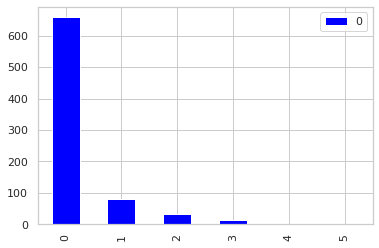

In [294]:
EHR_variance=pd.DataFrame(pca.explained_variance_)
EHR_variance.plot(kind='bar',color='blue')

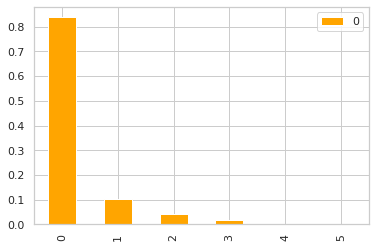

In [295]:
EHR_variance_ratio=pd.DataFrame(pca.explained_variance_ratio_)
EHR_variance_ratio.plot(kind='bar',color='orange')

In [296]:
from sklearn.ensemble import GradientBoostingClassifier

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.02,random_state=10)
print(" X train shape = ",X_train.shape)
print(" y train shape = ",y_train.shape)
print(" X test shape = ",X_test.shape)
print(" y test shape = ",y_test.shape)


 X train shape =  (3729, 6)
 y train shape =  (3729,)
 X test shape =  (77, 6)
 y test shape =  (77,)


In [299]:
model_gb=GradientBoostingClassifier()
model_gb.fit(X_train,y_train)
y_train_predict=model_gb.predict(X_train)
y_test_predict=model_gb.predict(X_test)

In [300]:
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 

col_0,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,21,22,24,26,28,29,30,31
PrimaryDiagnosisCode,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [301]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)
# print(classification_report(y_test,y_test_predict))

Accuracy of Training =  100.0
Accuracy of Testing =  100.0
Precision =  100.0
Recall =  100.0
F1 score =  100.0


## 5) Using PCA in eXtreme Gradient Boosting Classifier

In [302]:
pca=PCA(svd_solver='auto',random_state=10)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [303]:
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5
0,1.269566,4.416498,2.369200,4.746295,0.315899,0.577852
1,-24.723648,4.262780,-0.684271,4.672358,0.310229,0.580314
2,-24.725763,4.274278,0.315654,4.672353,0.306952,0.578265
3,5.284308,4.354354,-4.622008,4.757711,0.341219,0.592755
4,-24.738457,4.343266,6.315199,4.672320,0.287293,0.565977


In [304]:
pca.explained_variance_

array([6.58542732e+02, 8.06503359e+01, 3.18150941e+01, 1.27654238e+01,
       1.22413568e+00, 1.72472443e-01])

In [305]:
pca.explained_variance_ratio_

array([8.38726097e-01, 1.02717012e-01, 4.05199972e-02, 1.62581614e-02,
       1.55907050e-03, 2.19662494e-04])

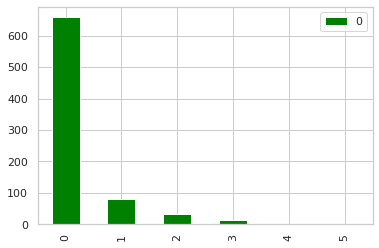

In [306]:
EHR_variance=pd.DataFrame(pca.explained_variance_)
EHR_variance.plot(kind='bar',color='green')

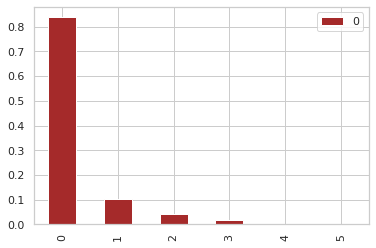

In [307]:
EHR_variance_ratio=pd.DataFrame(pca.explained_variance_ratio_)
EHR_variance_ratio.plot(kind='bar',color='brown')

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.02,random_state=10)
print(" X train shape = ",X_train.shape)
print(" y train shape = ",y_train.shape)
print(" X test shape = ",X_test.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (3729, 6)
 y train shape =  (3729,)
 X test shape =  (77, 6)
 y test shape =  (77,)


In [309]:
import xgboost

In [310]:
from xgboost import XGBClassifier

Model Feature Importances =  [0.00647604 0.25443524 0.01149507 0.27264825 0.27442044 0.18052498]


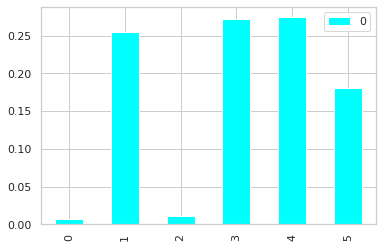

In [311]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

print("Model Feature Importances = " , model_xgb.feature_importances_)
feature_importances=pd.DataFrame(model_xgb.feature_importances_)
feature_importances.plot(kind='bar',color='cyan')


y_train_predict=model_xgb.predict(X_train)
y_test_predict=model_xgb.predict(X_test)

In [312]:
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 

col_0,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,21,22,24,26,28,29,30,31
PrimaryDiagnosisCode,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [313]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)
# print(classification_report(y_test,y_test_predict))

Accuracy of Training =  100.0
Accuracy of Testing =  100.0
Precision =  100.0
Recall =  100.0
F1 score =  100.0
